In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import log10 as lg
from numpy import pi as pi
from scipy.interpolate import interp1d as sp_interp1d
from scipy.integrate import odeint
from scipy.integrate import ode
import warnings
import timeit
import scipy.optimize as opt
from matplotlib import cm
from astropy import constants as const
from astropy import units as u
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['ytick.major.size'] = 8
plt.rcParams['xtick.minor.size'] = 4
plt.rcParams['ytick.minor.size'] = 4
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True
plt.rcParams['axes.labelpad'] = 8.0
plt.rcParams['figure.constrained_layout.h_pad'] = 0
plt.rcParams['text.usetex'] = True
plt.rc('text', usetex=True)
plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.tick_params(axis='both', which='minor', labelsize=18)
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
import sys
import warnings
import timeit
import numpy as np
import scipy.optimize
from numpy import pi
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.integrate import ode as sp_ode

t0 = timeit.time.time()
from shapely.geometry import LineString
from scipy.interpolate import UnivariateSpline
G=const.G.cgs.value
c=const.c.cgs.value
MSUN=const.M_sun.cgs.value
hbar=const.hbar.cgs.value
m_n=const.m_n.cgs.value
KM=10**5
import math

G=const.G.cgs.value
c=const.c.cgs.value
Ms=const.M_sun.cgs.value
hbar=const.hbar.cgs.value
m_n=const.m_n.cgs.value
km=10**5

plt.close()

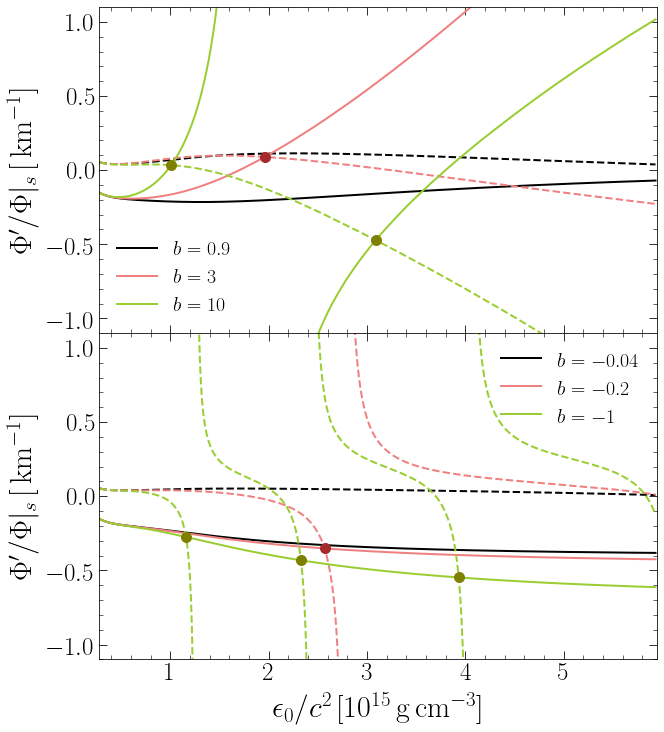

In [11]:
PI4 = 4.0 * pi
ka = 8.0 * pi
c = 29979245800.0  # cm/s
G = 6.67408e-8  # cm^3/g/s^2

MSUN = 1.98855e33  # g
KM = 1.0e5  # cm
mB = 1.660538921e-24  # g
E_NUCL = 2.0e14  # minimun energy density for NS core; g/cm^3

runit = 10.*KM # length to parametrize quantities

def rdiml(r):
    """ dimensionless mass """
    return r/runit    
def mdiml(m):
    """ dimensionless mass """
    return G*m/c**2/runit
def pdiml(p):
    """ dimensionless pressure """
    return G*p/c**4 * runit**2

colorset = ['black', 'lightcoral','yellowgreen']  


stdata1 = np.genfromtxt('stgb_linear_sol_data1.txt')
stdata2 = np.genfromtxt('stgb_linear_sol_data2.txt')
stdata3 = np.genfromtxt('stgb_linear_sol_data3.txt')
stdata4 = np.genfromtxt('stgb_linear_sol_data4.txt')
stdata5 = np.genfromtxt('stgb_linear_sol_data5.txt')
stdata6 = np.genfromtxt('stgb_linear_sol_data6.txt')

stn1 = len(stdata1)
#stn1, stn2, stn3, stn4, stn5 = len(strot1), len(strot2), len(strot3), len(strot4), len(strot5)
ntrim = 900

# ec, interior ph_r/ph, exterior ph_r/ph
d10, d11, d12 = stdata1[:, 0], stdata1[:, 1]/10, stdata1[:, 2]/10
d20, d21, d22 = stdata2[:, 0], stdata2[:, 1]/10, stdata2[:, 2]/10
d30, d31, d32 = stdata3[:, 0], stdata3[:, 1]/10, stdata3[:, 2]/10
d40, d41, d42 = stdata4[:, 0], stdata4[:, 1]/10, stdata4[:, 2]/10
d50, d51, d52 = stdata5[:, 0], stdata5[:, 1]/10, stdata5[:, 2]/10
d60, d61, d62 = stdata6[:, 0], stdata6[:, 1]/10, stdata6[:, 2]/10


fig, (ax1,ax2) = plt.subplots(2, 1,figsize=(10,12),sharex=True)
plt.subplots_adjust(hspace=0.0)






# ax1.set_xlabel(r'$\epsilon_0$', fontsize=20)
ax1.set_ylabel(r'$\Phi^{\prime}/\Phi|_{ s}\,[\rm \,km^{-1}]$', fontsize=30)
ax2.set_xlabel(r'$\epsilon_0/c^{2}\,[10^{15}\,\rm g\,\rm cm^{-3}]$', fontsize=30)
ax2.set_ylabel(r'$\Phi^{\prime}/\Phi|_{ s}\,[\rm \,km^{-1}]$', fontsize=30)


 
# ph_r/ph
ax1.set_ylim([-1.1, 1.1])
#ax1.set_xlim([0, 10])
ax1.plot( d40[0:ntrim]/10**15, d41[0:ntrim] , '--', color = colorset[0],linewidth=2)
ax1.plot( d40[0:ntrim]/10**15, d42[0:ntrim] , color = colorset[0],linewidth=2,label='$b=0.9$')
ax1.plot( d50[0:ntrim]/10**15, d51[0:ntrim] , '--', color = colorset[1],linewidth=2)
ax1.plot( d50[0:ntrim]/10**15, d52[0:ntrim] , color = colorset[1],linewidth=2,label='$b=3$')
line1=LineString(np.column_stack((d50/10**15,d51)))
line2=LineString(np.column_stack((d50/10**15,d52)))
intersection=line1.intersection(line2)
ax1.plot(*intersection.xy,color='brown',markersize=10,marker='o')
ax1.plot( d60[0:ntrim]/10**15, d61[0:ntrim] , '--', color = colorset[2],linewidth=2)
# a=np.zeros(900)
# b=np.zeros(900)


# find the jump location
for i in range(1,ntrim):
    if abs(d62[i]-d62[i-1])>10:
        a=d60[i]
        b=i

ax1.plot(d60[0:b-1]/10**15, d62[0:b-1] , color = colorset[2],linewidth=2,label='$b=10$')
ax1.plot(d60[b+1:ntrim]/10**15, d62[b+1:ntrim] , color = colorset[2],linewidth=2)
line1=LineString(np.column_stack((d60[b+1:ntrim]/10**15,d61[b+1:ntrim])))
line2=LineString(np.column_stack((d60[b+1:ntrim]/10**15,d62[b+1:ntrim])))
intersection=line1.intersection(line2)
ax1.plot(*intersection.xy,'olive',markersize=10,marker='o')
# line1=LineString(np.column_stack((d60/10**15,d61)))
# line2=LineString(np.column_stack((d60/10**15,d62)))
# intersection=line1.intersection(line2)
# if intersection.geom_type == 'MultiPoint':
#     ax1.plot(*LineString(intersection).xy, 'o')
# elif intersection.geom_type == 'Point':
#     plt.plot(*intersection.xy, 'o')

line1=LineString(np.column_stack((d60[0:b-1]/10**15,d61[0:b-1])))
line2=LineString(np.column_stack((d60[0:b-1]/10**15,d62[0:b-1])))
intersection=line1.intersection(line2)
ax1.plot(*intersection.xy,'olive',markersize=10,marker='o')


ax2.set_ylim([-1.1, 1.1])
#ax1.set_xlim([0, 10])
ax2.plot( d10[0:ntrim]/10**15, d11[0:ntrim] , '--', color = colorset[0],linewidth=2)
ax2.plot( d10[0:ntrim]/10**15, d12[0:ntrim] , color = colorset[0],linewidth=2,label='$b=-0.04$')

for k in range(1,ntrim):
    if abs(d21[k]-d21[k-1])>50:
        e=d20[k]
        f=k
ax2.plot( d20[0:f-1]/10**15, d21[0:f-1] , '--', color = colorset[1],linewidth=2)
ax2.plot( d20[f+1:ntrim]/10**15, d21[f+1:ntrim] , '--', color = colorset[1],linewidth=2)
ax2.plot( d20[0:ntrim]/10**15, d22[0:ntrim] , color = colorset[1],linewidth=2,label='$b=-0.2$')

line1=LineString(np.column_stack((d20[0:f-1]/10**15, d21[0:f-1])))
line2=LineString(np.column_stack((d20[0:f-1]/10**15, d22[0:f-1])))
intersection=line1.intersection(line2)
ax2.plot(*intersection.xy,color='brown',markersize=10,marker='o')


# find the jump location
c=[]
d=[]
for i in range(1,ntrim):
    if abs(d31[i]-d31[i-1])>10:
        c.append(d31[i])
        d.append(i)
    
ax2.plot( d30[0:439]/10**15, d31[0:439] , '--', color = colorset[2],linewidth=2)
ax2.plot( d30[446:635]/10**15, d31[446:635] , '--', color = colorset[2],linewidth=2)
ax2.plot( d30[640:787]/10**15, d31[640:787] , '--', color = colorset[2],linewidth=2)
ax2.plot( d30[788:ntrim]/10**15, d31[788:ntrim] , '--', color = colorset[2],linewidth=2)
# ax2.plot( d30[0:ntrim]/10**15, d31[0:ntrim] , '--', color = colorset[2],linewidth=2)
ax2.plot( d30[0:ntrim]/10**15, d32[0:ntrim] , color = colorset[2],linewidth=2,label='$b=-1$')

line1=LineString(np.column_stack((d30[0:439]/10**15, d31[0:439])))
line2=LineString(np.column_stack((d30[0:439]/10**15, d32[0:439])))
intersection=line1.intersection(line2)
ax2.plot(*intersection.xy,color='olive',markersize=10,marker='o')

line1=LineString(np.column_stack((d30[446:635]/10**15, d31[446:635])))
line2=LineString(np.column_stack((d30[446:635]/10**15, d32[446:635])))
intersection=line1.intersection(line2)
ax2.plot(*intersection.xy,color='olive',markersize=10,marker='o')

line1=LineString(np.column_stack((d30[640:787]/10**15, d31[640:787])))
line2=LineString(np.column_stack((d30[640:787]/10**15, d32[640:787])))
intersection=line1.intersection(line2)
ax2.plot(*intersection.xy,color='olive',markersize=10,marker='o')




plt.xlim(min(d10)/10**15,d10[ntrim]/10**15)
ax1.minorticks_on()
ax2.minorticks_on()
# print( '\n *** STG_solver uses %.2f seconds\n' % (timeit.time.time() - t0))
ax1.legend(fontsize=20,frameon=False)
ax2.legend(fontsize=20,frameon=False,loc='upper right')
plt.savefig("fig/fig_lin1.pdf", format='pdf', bbox_inches="tight")
# plt.show()

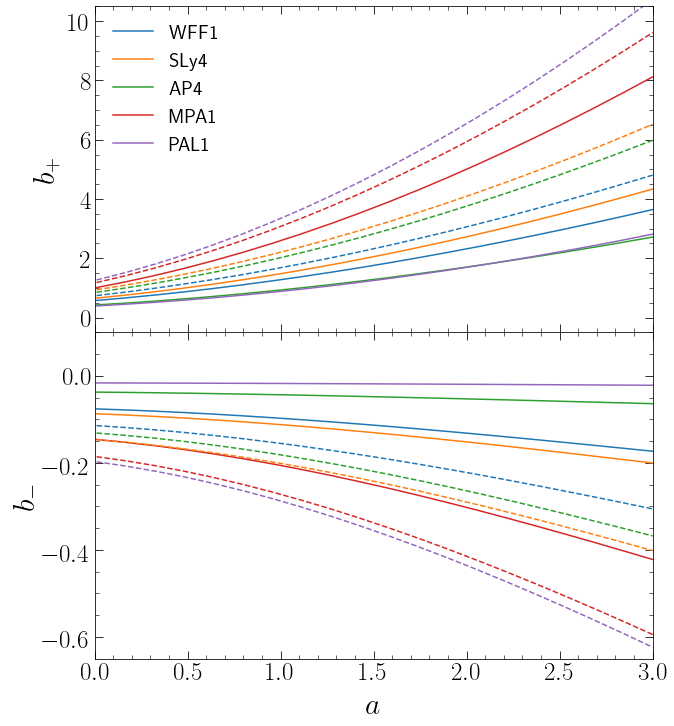

In [3]:
colorset=['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']   

fig, (ax1,ax2) = plt.subplots(2, 1,figsize=(10,12),sharex=True)
plt.subplots_adjust(hspace=0.0)
from scipy.interpolate import UnivariateSpline

# ax1.set_xlabel(r'$a$', fontsize=30)
ax1.set_ylabel(r'$b_{+}$', fontsize=30)
ax2.set_xlabel(r'$a$', fontsize=30)
ax2.set_ylabel(r'$b_{-}$', fontsize=30)

 
# ph_r/ph
#ax1.set_ylim([-10, 10])

label=['WFF1','SLy4','AP4', 'MPA1','PAL1']
data1 = np.genfromtxt('stgb_linear_v1_xia_data1.txt')

for j in range(5):
    x=data1[:,0]
    y=data1[:,j+1]
    s1 = UnivariateSpline(x, y, s=5)
    xs=np.linspace(min(x),max(x),20)
    ys=s1(xs)
    ax2.plot( xs,ys , color = colorset[j],linewidth=1.5)

data2 = np.genfromtxt('stgb_linear_v1_xia_data2.txt')
for j in range(5):
    x=data2[:,0]
    y=data2[:,j+1]
    s1 = UnivariateSpline(x, y, s=5)
    xs=np.linspace(min(x),max(x),20)
    ys=s1(xs)
    ax2.plot( xs,ys , color = colorset[j],linewidth=1.5,linestyle='--')
    
    
data3 = np.genfromtxt('stgb_linear_v1_xia_data3.txt')
for j in range(5):
    x=data3[:,0]
    y=data3[:,j+1]
    s1 = UnivariateSpline(x, y, s=5)
    xs=np.linspace(min(x),max(x),20)
    ys=s1(xs)
    ax1.plot( xs,ys , color = colorset[j],linewidth=1.5,label=label[j])
    
data4 = np.genfromtxt('stgb_linear_v1_xia_data4.txt')
for j in range(5):
    x=data4[:,0]
    y=data4[:,j+1]
    s1 = UnivariateSpline(x, y, s=5)
    xs=np.linspace(min(x),max(x),20)
    ys=s1(xs)
    ax1.plot( xs,ys , color = colorset[j],linewidth=1.5,linestyle='--')

ax2.set_ylim(-0.65,0.1)
ax1.set_ylim(-0.5,10.5)
plt.xlim(0,3)

ax1.minorticks_on()
ax2.minorticks_on()

plt.savefig("fig/fig_lin2.pdf", format='pdf', bbox_inches="tight")
# print( '\n *** STG_solver uses %.2f seconds\n' % (timeit.time.time() - t0))
ax1.legend(fontsize=20,frameon=False)
plt.show()




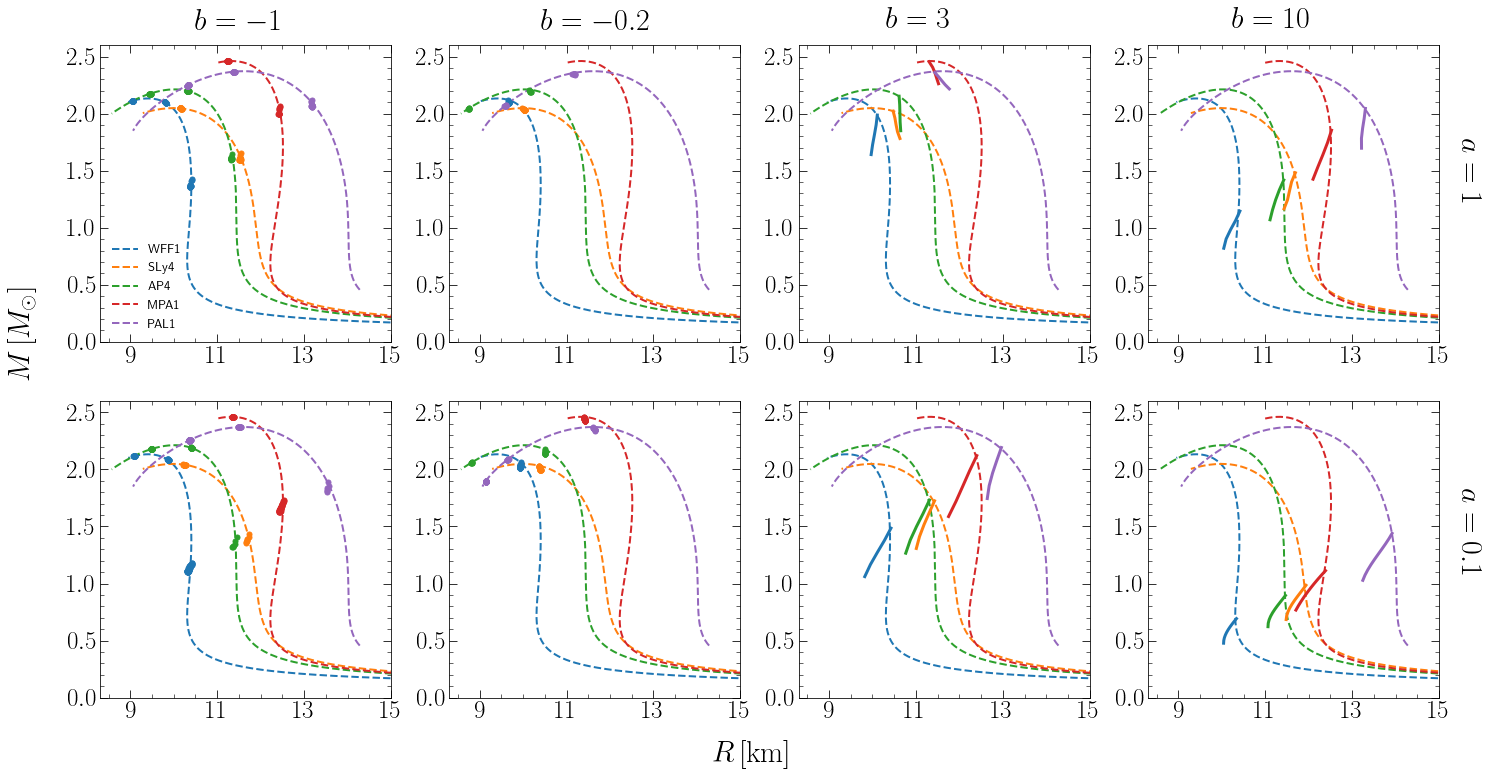

In [4]:
label=['WFF1','SLy4','AP4', 'MPA1','PAL1']
fig, axs = plt.subplots(2, 4,figsize=(24,12))
colorset=['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple'] 
plt.setp(axs, yticks=[0, 0.5, 1,1.5,2,2.5],xticks=[9,11,13,15])

for i in range(2):
    for j in range(4):
        for k in range(5):
            datagr=np.genfromtxt('TOV_5eqs_data'+str(k+1)+'.txt')
            M=datagr[:,1]
            R=datagr[:,2]
            if i==0 and j==0:
              axs[i,j].plot(R/10**5,M/Ms,color=colorset[k],linestyle='--',linewidth=2, label=label[k])
            else:
              axs[i,j].plot(R/10**5,M/Ms,color=colorset[k],linestyle='--',linewidth=2)
            axs[i,j].set_ylim(0,2.6)
            axs[i,j].set_xlim(8.3,15)
            axs[i,j].minorticks_on()
            
# the first plot
for i in range(5):
    data=np.genfromtxt('stgb_solver_pdata2'+str(i+1)+'.txt')
    b021, b121, b221, b321, b421, b521, b621, b721, b821, b921=data[:, 0], \
    data[:, 1], data[:, 2], data[:, 3], data[:, 4], data[:, 5], \
    data[:, 6], data[:, 7], data[:, 8], data[:, 9] 
    ecstep = 0.6e+15
    ntrimset = np.array([0])
    for ii in range(0, len(b021)-1):
        testecsep = b021[ii+1]-b021[ii]
        if testecsep > ecstep:     
            ntrimset = np.append(ntrimset, ii+1)
    ntrimset = np.append(ntrimset, len(b021))
    for ii in range(0, len(ntrimset)-1):
        axs[0,0].plot(b321[ntrimset[ii]:ntrimset[ii+1]]/KM, \
                     b421[ntrimset[ii]:ntrimset[ii+1]]/MSUN, 'o', color = colorset[i],markersize=5)  

# the second plot
list2=[26,27,28,30]
for i in range(4):
    a=list2[i]
    data=np.genfromtxt('stgb_solver_pdata'+str(list2[i])+'.txt')
    b021, b121, b221, b321, b421, b521, b621, b721, b821, b921=data[:, 0], \
    data[:, 1], data[:, 2], data[:, 3], data[:, 4], data[:, 5], \
    data[:, 6], data[:, 7], data[:, 8], data[:, 9] 
    ecstep = 0.6e+15
    ntrimset = np.array([0])
    for ii in range(0, len(b021)-1):
        testecsep = b021[ii+1]-b021[ii]
        if testecsep > ecstep:     
            ntrimset = np.append(ntrimset, ii+1)
    ntrimset = np.append(ntrimset, len(b021))
    for ii in range(0, len(ntrimset)-1):
        if a!=30:
            axs[0,1].plot(b321[ntrimset[ii]:ntrimset[ii+1]]/KM, \
            b421[ntrimset[ii]:ntrimset[ii+1]]/MSUN, 'o', color = colorset[i],markersize=5) 
        else:
            axs[0,1].plot(b321[ntrimset[ii]:ntrimset[ii+1]]/KM, \
            b421[ntrimset[ii]:ntrimset[ii+1]]/MSUN, 'o', color = colorset[i+1],markersize=5) 

# the third plot

for i in range(5):
    data=np.genfromtxt('stgb_solver_pdata'+str(31+i)+'.txt')
    b021, b121, b221, b321, b421, b521, b621, b721, b821, b921=data[:, 0], \
    data[:, 1], data[:, 2], data[:, 3], data[:, 4], data[:, 5], \
    data[:, 6], data[:, 7], data[:, 8], data[:, 9] 
    ecstep = 0.6e+15
    ntrimset = np.array([0])
    for ii in range(0, len(b021)-1):
        testecsep = b021[ii+1]-b021[ii]
        if testecsep > ecstep:     
            ntrimset = np.append(ntrimset, ii+1)
    ntrimset = np.append(ntrimset, len(b021))
    for ii in range(0, len(ntrimset)-1):
        x=b321[ntrimset[ii]:ntrimset[ii+1]]/KM
        y=b421[ntrimset[ii]:ntrimset[ii+1]]/MSUN
        index=y.argsort()
        ydata=y[index]
        xdata=x[index]
        s1 = UnivariateSpline(ydata, xdata, s=5)
        ys=np.linspace(min(ydata),max(ydata),5)
        xs=s1(ys)
        axs[0,2].plot(xs,ys, color = colorset[i],markersize=5,linewidth=3) 
        
# the fourth plot

for i in range(5):
    data=np.genfromtxt('stgb_solver_pdata'+str(36+i)+'.txt')
    b021, b121, b221, b321, b421, b521, b621, b721, b821, b921=data[:, 0], \
    data[:, 1], data[:, 2], data[:, 3], data[:, 4], data[:, 5], \
    data[:, 6], data[:, 7], data[:, 8], data[:, 9] 
    ecstep = 0.6e+15
    ntrimset = np.array([0])
    for ii in range(0, len(b021)-1):
        testecsep = b021[ii+1]-b021[ii]
        if testecsep > ecstep:     
            ntrimset = np.append(ntrimset, ii+1)
    ntrimset = np.append(ntrimset, len(b021))
    for ii in range(0, len(ntrimset)-1):
        x=b321[ntrimset[ii]:ntrimset[ii+1]]/KM
        y=b421[ntrimset[ii]:ntrimset[ii+1]]/MSUN
        index=y.argsort()
        ydata=y[index]
        xdata=x[index]
        s1 = UnivariateSpline(ydata, xdata, s=5)
        ys=np.linspace(min(ydata),max(ydata),5)
        xs=s1(ys)
        axs[0,3].plot(xs,ys, color = colorset[i],markersize=5,linewidth=3)

# the fifth plot
for i in range(5):
    data=np.genfromtxt('stgb_solver_pdata'+str(i+1)+'.txt')
    b021, b121, b221, b321, b421, b521, b621, b721, b821, b921=data[:, 0], \
    data[:, 1], data[:, 2], data[:, 3], data[:, 4], data[:, 5], \
    data[:, 6], data[:, 7], data[:, 8], data[:, 9] 
    ecstep = 0.6e+15
    ntrimset = np.array([0])
    for ii in range(0, len(b021)-1):
        testecsep = b021[ii+1]-b021[ii]
        if testecsep > ecstep:     
            ntrimset = np.append(ntrimset, ii+1)
    ntrimset = np.append(ntrimset, len(b021))
    for ii in range(0, len(ntrimset)-1):
        axs[1,0].plot(b321[ntrimset[ii]:ntrimset[ii+1]]/KM, \
                     b421[ntrimset[ii]:ntrimset[ii+1]]/MSUN, 'o', color = colorset[i],markersize=5) 
        
# the sixth plot
for i in range(5):
    data=np.genfromtxt('stgb_solver_pdata'+str(i+6)+'.txt')
    b021, b121, b221, b321, b421, b521, b621, b721, b821, b921=data[:, 0], \
    data[:, 1], data[:, 2], data[:, 3], data[:, 4], data[:, 5], \
    data[:, 6], data[:, 7], data[:, 8], data[:, 9] 
    ecstep = 0.6e+15
    ntrimset = np.array([0])
    for ii in range(0, len(b021)-1):
        testecsep = b021[ii+1]-b021[ii]
        if testecsep > ecstep:     
            ntrimset = np.append(ntrimset, ii+1)
    ntrimset = np.append(ntrimset, len(b021))
    for ii in range(0, len(ntrimset)-1):
        axs[1,1].plot(b321[ntrimset[ii]:ntrimset[ii+1]]/KM, \
                     b421[ntrimset[ii]:ntrimset[ii+1]]/MSUN, 'o', color = colorset[i],markersize=5) 
        
# the seventh plot
for i in range(5):
    data=np.genfromtxt('stgb_solver_pdata'+str(11+i)+'.txt')
    b021, b121, b221, b321, b421, b521, b621, b721, b821, b921=data[:, 0], \
    data[:, 1], data[:, 2], data[:, 3], data[:, 4], data[:, 5], \
    data[:, 6], data[:, 7], data[:, 8], data[:, 9] 
    ecstep = 0.6e+15
    ntrimset = np.array([0])
    for ii in range(0, len(b021)-1):
        testecsep = b021[ii+1]-b021[ii]
        if testecsep > ecstep:     
            ntrimset = np.append(ntrimset, ii+1)
    ntrimset = np.append(ntrimset, len(b021))
    for ii in range(0, len(ntrimset)-1):
        x=b321[ntrimset[ii]:ntrimset[ii+1]]/KM
        y=b421[ntrimset[ii]:ntrimset[ii+1]]/MSUN
        index=y.argsort()
        ydata=y[index]
        xdata=x[index]
        s1 = UnivariateSpline(ydata, xdata, s=5)
        ys=np.linspace(min(ydata),max(ydata),5)
        xs=s1(ys)
        axs[1,2].plot(xs,ys, color = colorset[i],markersize=5,linewidth=3)
        
# the eighth plot
for i in range(5):
    data=np.genfromtxt('stgb_solver_pdata'+str(16+i)+'.txt')
    b021, b121, b221, b321, b421, b521, b621, b721, b821, b921=data[:, 0], \
    data[:, 1], data[:, 2], data[:, 3], data[:, 4], data[:, 5], \
    data[:, 6], data[:, 7], data[:, 8], data[:, 9] 
    ecstep = 0.6e+15
    ntrimset = np.array([0])
    for ii in range(0, len(b021)-1):
        testecsep = b021[ii+1]-b021[ii]
        if testecsep > ecstep:     
            ntrimset = np.append(ntrimset, ii+1)
    ntrimset = np.append(ntrimset, len(b021))
    for ii in range(0, len(ntrimset)-1):
        x=b321[ntrimset[ii]:ntrimset[ii+1]]/KM
        y=b421[ntrimset[ii]:ntrimset[ii+1]]/MSUN
        index=y.argsort()
        ydata=y[index]
        xdata=x[index]
        s1 = UnivariateSpline(ydata, xdata, s=5)
        ys=np.linspace(min(ydata),max(ydata),10)
        xs=s1(ys)
        axs[1,3].plot(xs,ys, color = colorset[i],markersize=5,linewidth=3)
        
# plot decorations and labels

axs[0,0].legend(fontsize=13, frameon=False)


fig.text(0.08, 0.5, r'$M\,[{ M_{\odot}}]$', ha='center', fontsize=30,rotation='vertical')
fig.text(0.48, 0.05, r'$R\,[\rm km]$' ,fontsize=30)      
fig.text(0.91, 0.7, r'$a=1$' ,fontsize=30, rotation='-90')          
fig.text(0.91, 0.27, r'$a=0.1$' ,fontsize=30, rotation='-90')     
fig.text(0.18, 0.9, r'$b=-1$' ,fontsize=30)     
fig.text(0.38, 0.9, r'$b=-0.2$' ,fontsize=30)     
fig.text(0.58, 0.9, r'$b=3$' ,fontsize=30)   
fig.text(0.78, 0.9, r'$b=10$' ,fontsize=30)  
plt.savefig("fig/fig_nonlin_MR.pdf", format='pdf', bbox_inches="tight")

plt.show()



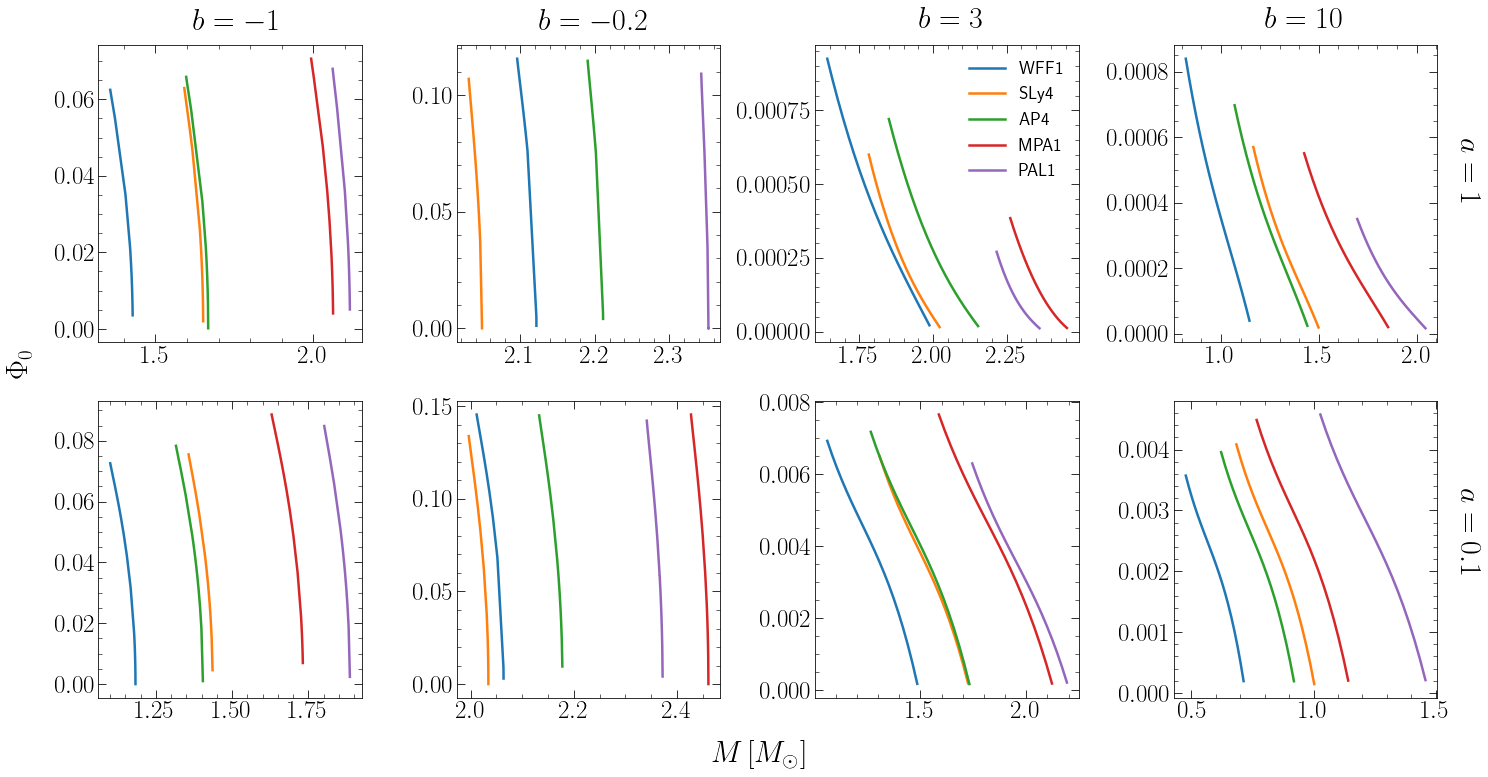

In [5]:
fig, axs = plt.subplots(2, 4,figsize=(24,12),linewidth=2)
colorset=['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple'] 
plt.subplots_adjust(wspace=0.36)
# plt.setp(axs, xticks=[0, 0.5, 1,1.5,2,2.5])
# from matplotlib import ticker
# formatter = ticker.ScalarFormatter(useMathText=True)
# formatter.set_scientific(True) 
# formatter.set_powerlimits((-5,-3)) 
# axs[0,2].yaxis.set_major_formatter(formatter)
# axs[0,2].set_yticks([2.5*10**(-4)])



for i in range(2):
    for j in range(4):
        axs[i,j].minorticks_on()
        
# the first plot
for i in range(5):
    data=np.genfromtxt('stgb_tid_v1_comb_data'+str(i+21)+'.txt')
    b021, b121, b221, b321, b421, b521, b621, b721=data[:, 0], data[:, 1], \
    data[:, 2], data[:, 3], data[:, 4], data[:, 5], data[:, 6], data[:, 7] 
    axs[0,0].plot(b321/MSUN, b121, color = colorset[i],linewidth=2.5) 

list2=[26,27,28,30]
# the second plot
for i in range(4):
    data=np.genfromtxt('stgb_tid_v1_comb_data'+str(list2[i])+'.txt')
    b021, b121, b221, b321, b421, b521, b621, b721=data[:, 0], data[:, 1], \
    data[:, 2], data[:, 3], data[:, 4], data[:, 5], data[:, 6], data[:, 7]
    if list2[i]!=30:
        axs[0,1].plot(b321/MSUN, b121, color = colorset[i],linewidth=2.5) 
    else:
        axs[0,1].plot(b321/MSUN, b121, color = colorset[i+1],linewidth=2.5) 
        
# the third plot
for i in range(5):
    """
    data=np.genfromtxt('stgb_tid_v1_comb_data'+str(i+31)+'.txt')
    b021, b121, b221, b321, b421, b521, b621, b721=data[:, 0], data[:, 1], \
    data[:, 2], data[:, 3], data[:, 4], data[:, 5], data[:, 6], data[:, 7] 
    axs[0,2].plot(b321/MSUN, b121, color = colorset[i],linewidth=2.5) 
    """
    data=np.genfromtxt('stgb_tid_v1_comb_data'+str(i+31)+'.txt')
    b021, b121, b221, b321, b421, b521, b621, b721=data[:, 0], data[:, 1], \
    data[:, 2], data[:, 3], data[:, 4], data[:, 5], data[:, 6], data[:, 7] 
#     axs[1,2].plot(b321/MSUN, b121, color = colorset[i],linewidth=2.5) 
    index=b321.argsort()
    ydata=b121[index]
    xdata=b321[index]/MSUN
    s1 = UnivariateSpline(xdata, ydata, s=5)
    xs=np.linspace(min(xdata),max(xdata),20)
    ys=s1(xs)
    axs[0,2].plot(xs, ys, color = colorset[i],linewidth=2.5,label=label[i])    
axs[0,2].legend(frameon=False,fontsize=18)
# the fourth plot
for i in range(5):
    """
    data=np.genfromtxt('stgb_tid_v1_comb_data'+str(i+36)+'.txt')
    b021, b121, b221, b321, b421, b521, b621, b721=data[:, 0], data[:, 1], \
    data[:, 2], data[:, 3], data[:, 4], data[:, 5], data[:, 6], data[:, 7] 
    axs[0,3].plot(b321/MSUN, b121, color = colorset[i],linewidth=2.5) 
    """
    data=np.genfromtxt('stgb_tid_v1_comb_data'+str(i+36)+'.txt')
    b021, b121, b221, b321, b421, b521, b621, b721=data[:, 0], data[:, 1], \
    data[:, 2], data[:, 3], data[:, 4], data[:, 5], data[:, 6], data[:, 7] 
#     axs[1,2].plot(b321/MSUN, b121, color = colorset[i],linewidth=2.5) 
    index=b321.argsort()
    ydata=b121[index]
    xdata=b321[index]/MSUN
    s1 = UnivariateSpline(xdata, ydata, s=5)
    xs=np.linspace(min(xdata),max(xdata),20)
    ys=s1(xs)
    axs[0,3].plot(xs, ys, color = colorset[i],linewidth=2.5)
    
# the fifth plot
for i in range(5):
    data=np.genfromtxt('stgb_tid_v1_comb_data'+str(i+1)+'.txt')
    b021, b121, b221, b321, b421, b521, b621, b721=data[:, 0], data[:, 1], \
    data[:, 2], data[:, 3], data[:, 4], data[:, 5], data[:, 6], data[:, 7] 
    axs[1,0].plot(b321/MSUN, b121, color = colorset[i],linewidth=2.5) 
    
    
# the sixth plot
for i in range(5):
    data=np.genfromtxt('stgb_tid_v1_comb_data'+str(6+i)+'.txt')
    b021, b121, b221, b321, b421, b521, b621, b721=data[:, 0], data[:, 1], \
    data[:, 2], data[:, 3], data[:, 4], data[:, 5], data[:, 6], data[:, 7]
    if i!=4:
        axs[1,1].plot(b321/MSUN, b121, color = colorset[i],linewidth=2.5) 
    else:
        axs[1,1].plot(b321/MSUN, b121, color = colorset[i],linewidth=2.5)
        
# the seventh plot
for i in range(5):
    data=np.genfromtxt('stgb_tid_v1_comb_data'+str(i+11)+'.txt')
    b021, b121, b221, b321, b421, b521, b621, b721=data[:, 0], data[:, 1], \
    data[:, 2], data[:, 3], data[:, 4], data[:, 5], data[:, 6], data[:, 7] 
#     axs[1,2].plot(b321/MSUN, b121, color = colorset[i],linewidth=2.5) 
    index=b321.argsort()
    ydata=b121[index]
    xdata=b321[index]/MSUN
    s1 = UnivariateSpline(xdata, ydata, s=5)
    xs=np.linspace(min(xdata),max(xdata),20)
    ys=s1(xs)
    axs[1,2].plot(xs, ys, color = colorset[i],linewidth=2.5) 
    
# the eighth plot
for i in range(5):
    data=np.genfromtxt('stgb_tid_v1_comb_data'+str(i+16)+'.txt')
    b021, b121, b221, b321, b421, b521, b621, b721=data[:, 0], data[:, 1], \
    data[:, 2], data[:, 3], data[:, 4], data[:, 5], data[:, 6], data[:, 7] 
#     axs[1,3].plot(b321/MSUN, b121, color = colorset[i],linewidth=2.5) 
    index=b321.argsort()
    ydata=b121[index]
    xdata=b321[index]/MSUN
    s1 = UnivariateSpline(xdata, ydata, s=5)
    xs=np.linspace(min(xdata),max(xdata),20)
    ys=s1(xs)
    axs[1,3].plot(xs, ys, color = colorset[i],linewidth=2.5)
    
fig.text(0.08, 0.50,r'$\Phi_{0}$'  , ha='center', fontsize=30,rotation='vertical')
fig.text(0.48, 0.05, r'$M\,[{ M_{\odot}}]$',fontsize=30)      
fig.text(0.91, 0.7, r'$a=1$' ,fontsize=30, rotation='-90')          
fig.text(0.91, 0.27, r'$a=0.1$' ,fontsize=30, rotation='-90')     
fig.text(0.18, 0.9, r'$b=-1$' ,fontsize=30)     
fig.text(0.38, 0.9, r'$b=-0.2$' ,fontsize=30)     
fig.text(0.6, 0.9, r'$b=3$' ,fontsize=30)   
fig.text(0.8, 0.9, r'$b=10$' ,fontsize=30)  
plt.savefig("fig/fig_nonlin_Mbphc.pdf", format='pdf', bbox_inches="tight")
plt.show()



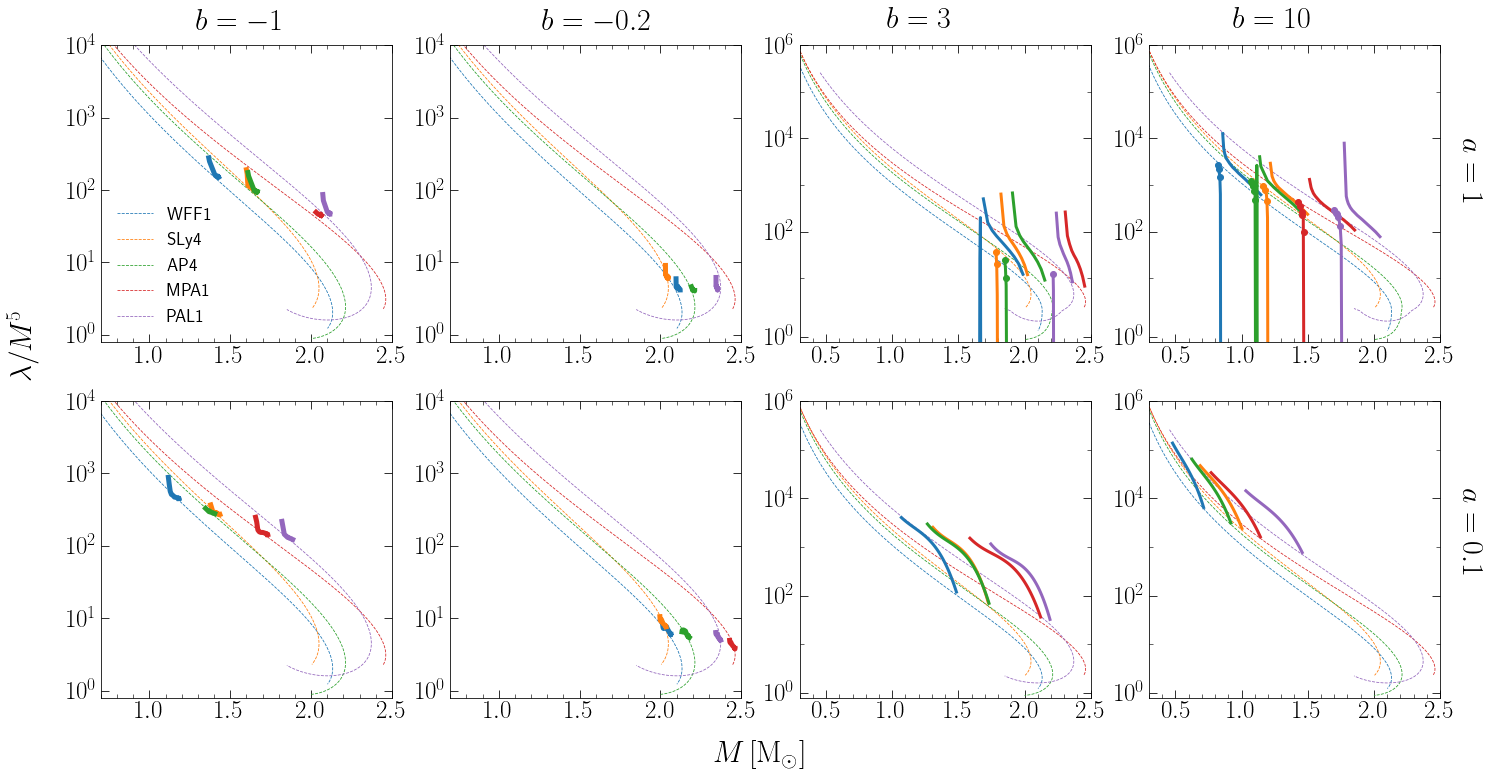

In [6]:
import matplotlib.ticker as mticker 
fig, axs = plt.subplots(2, 4,figsize=(24,12))
colorset=['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple'] 
plt.setp(axs, xticks=[0, 0.5, 1,1.5,2,2.5])

axs[0,0].set_ylim(0.8,1e4)
axs[0,1].set_ylim(0.8,1e4)
axs[0,2].set_ylim(0.8,1e6)
axs[0,3].set_ylim(0.8,1e6)
axs[1,0].set_ylim(0.8,1e4)
axs[1,1].set_ylim(0.8,1e4)
axs[1,2].set_ylim(0.8,1e6)
axs[1,3].set_ylim(0.8,1e6)
axs[0,0].set_xlim(0.7, 2.5)
axs[0,1].set_xlim(0.7, 2.5)
axs[0,2].set_xlim(0.3, 2.5)
axs[0,3].set_xlim(0.3, 2.5)
axs[1,0].set_xlim(0.7, 2.5)
axs[1,1].set_xlim(0.7, 2.5)
axs[1,2].set_xlim(0.3, 2.5)
axs[1,3].set_xlim(0.3, 2.5)

for i in range(2):
    for j in range(4):
        for k in range(5):
            grdata1=np.genfromtxt('TOV_tidal_v1_data'+str(k+1)+'.txt')
            a10, a11, a12, a13, a14 = grdata1[:, 0], grdata1[:, 1], grdata1[:, 2], grdata1[:, 3], grdata1[:, 4]
            axs[i,j].plot(a11/Ms,a13,color=colorset[k],linestyle='--',linewidth=0.8,label=label[k])
#             axs[i,j].set_ylim(0.9,10000)
            axs[i,j].set_yscale('symlog')
            axs[i,j].minorticks_off()            
            axs[i,j].xaxis.set_minor_locator(MultipleLocator(0.1))
axs[0,0].legend(frameon=False,fontsize=18)
ntrim1set=[13, 16, 14, 15, 13]
ntrim2set=[22, 20, 16, 20]
ntrim3set=[17, 17, 18, 16, 14]
ntrim4set=[18, 14, 9, 16, 13]
ntrim5set=[18, 13, 12, 17, 13]
ntrim6set=[19, 21, 21, 24, 23]


# the first plot
offset = [15, 15, 10, 5, 5]
for i in range(5):
    stdata21=np.genfromtxt('stgb_tid_v1_comb_data2'+str(i+1)+'.txt')
    c021, c121, c221, c321, c421, c521, c621, c721, c821, c921, \
    c1021=stdata21[:, 0], stdata21[:, 1], stdata21[:, 2], \
    stdata21[:, 3], stdata21[:, 4], stdata21[:, 5], stdata21[:, 6], \
    stdata21[:, 7], stdata21[:, 8], stdata21[:, 9], stdata21[:, 10] 
    x21 = c321[0:ntrim1set[i]]/MSUN 
    y21 = c921[0:ntrim1set[i]] - offset[i]*np.ones_like(c921[0:ntrim1set[i]])
    #axs[0,0].semilogy(x21, y21, 'o', color = colorset[i])
    axs[0,0].semilogy(x21, y21, color = colorset[i], linewidth =5)     
axs[0,0].set_yticks([1,10,100,1000,10000]) 
axs[0,0].minorticks_off()
axs[0,0].xaxis.set_minor_locator(MultipleLocator(0.1)) 
# axs[0,0].legend(frameon=False,fontsize=18)
    
# the second plot
list2=[26,27,28,30]
for i in range(4):
    stdata21=np.genfromtxt('stgb_tid_v1_comb_data'+str(list2[i])+'.txt')
    c021, c121, c221, c321, c421, c521, c621, c721, c821, c921, \
    c1021=stdata21[:, 0], stdata21[:, 1], stdata21[:, 2], \
    stdata21[:, 3], stdata21[:, 4], stdata21[:, 5], stdata21[:, 6], \
    stdata21[:, 7], stdata21[:, 8], stdata21[:, 9], stdata21[:, 10] 
    x21 = c321[0:ntrim2set[i]]/MSUN 
    y21 = c921[0:ntrim2set[i]] 
    if list2[i]!=30:
        #axs[0,1].semilogy(x21, y21, 'o', color = colorset[i]) 
        axs[0,1].semilogy(x21, y21, color = colorset[i], linewidth =5)           
    else:
        #axs[0,1].semilogy(x21, y21, 'o', color = colorset[i+1])
        axs[0,1].semilogy(x21, y21, color = colorset[i+1], linewidth =5)        
axs[0,1].set_yticks([1,10,100,1000,10000])
axs[0,1].minorticks_off()
axs[0,1].xaxis.set_minor_locator(MultipleLocator(0.1))
    
n1=np.array([17, 17, 18, 16, 14])    
# the third plot
for i in range(5):
    warnings.filterwarnings("ignore", category=UserWarning)
    stdata21=np.genfromtxt('stgb_tid_v1_comb_data3'+str(i+1)+'.txt')
    c021, c121, c221, c321, c421, c521, c621, c721, c821, c921, \
    c1021=stdata21[:, 0], stdata21[:, 1], stdata21[:, 2], \
    stdata21[:, 3], stdata21[:, 4], stdata21[:, 5], stdata21[:, 6], \
    stdata21[:, 7], stdata21[:, 8], stdata21[:, 9], stdata21[:, 10] 
    x21 = c321/MSUN 
    y21 = c921 
    
    x1=x21[0:n1[i]]
    y1=y21[0:n1[i]]
    index=x1.argsort()
    ydata=y1[index]
    xdata=x1[index]
    s1 = UnivariateSpline(xdata, ydata, s=5)
    xs=np.linspace(min(xdata),max(xdata),10)
    ys=s1(xs)
    axs[0,2].plot(xs, ys, color = colorset[i],linewidth=3) 
    
    x2=x21[n1[i]:len(x21)]
    y2=y21[n1[i]:len(x21)]
    index=x2.argsort()
    ydata=y2[index]
    xdata=x2[index]
    s1 = UnivariateSpline(xdata, ydata, s=5)
    xs=np.linspace(min(xdata),max(xdata),10)
    ys=s1(xs)
    axs[0,2].plot(x2, y2, 'o', color = colorset[i])     
    axs[0,2].plot(xs, ys, color = colorset[i],linewidth=3) 
    axs[0,2].set_yscale('symlog')
axs[0,2].set_yticks([1, 1e2, 1e4, 1e6])
y_minor = mticker.LogLocator(base = 10.0, subs = np.arange(1.0, 2.0) * 1, numticks = 10)
axs[0,2].yaxis.set_minor_locator(y_minor)
axs[0,2].yaxis.set_minor_formatter(mticker.NullFormatter())


n2=np.array([18, 14, 9, 16, 13]) 
# the fourth plot
for i in range(5):
    warnings.filterwarnings("ignore", category=UserWarning)
    stdata21=np.genfromtxt('stgb_tid_v1_comb_data'+str(i+36)+'.txt')
    c021, c121, c221, c321, c421, c521, c621, c721, c821, c921, \
    c1021=stdata21[:, 0], stdata21[:, 1], stdata21[:, 2], \
    stdata21[:, 3], stdata21[:, 4], stdata21[:, 5], stdata21[:, 6], \
    stdata21[:, 7], stdata21[:, 8], stdata21[:, 9], stdata21[:, 10] 
    x21 = c321/MSUN
    y21 = c921
    x1=x21[0:n2[i]]
    y1=y21[0:n2[i]]
    #print(y1)
#     index=x1.argsort()
#     ydata=y1[index]
#     xdata=x1[index]
#     s1 = UnivariateSpline(xdata, ydata, s=5)
#     xs=np.linspace(min(xdata),max(xdata),10)
#     ys=s1(xs)
    axs[0,3].plot(x1, y1, color = colorset[i],linewidth=3) 
    
    x2=x21[n2[i]:len(x21)]
    y2=y21[n2[i]:len(x21)]
    #print(y2)
    index=x2.argsort()
    ydata=y2[index]
    xdata=x2[index]
    s1 = UnivariateSpline(xdata, ydata, s=5)
    xs=np.linspace(min(xdata),max(xdata),10)
    ys=s1(xs)
    axs[0,3].plot(x2, y2, 'o', color = colorset[i])
    axs[0,3].plot(xs, ys, color = colorset[i],linewidth=3) 
    axs[0,3].set_yscale('symlog')
axs[0,3].set_yticks([1, 1e2, 1e4, 1e6])
y_minor = mticker.LogLocator(base = 10.0, subs = np.arange(1.0, 2.0) * 1, numticks = 10)
axs[0,3].yaxis.set_minor_locator(y_minor)
axs[0,3].yaxis.set_minor_formatter(mticker.NullFormatter())

# the fifth plot
for i in range(5):
    stdata1=np.genfromtxt('stgb_tid_v1_comb_data'+str(i+1)+'.txt')

    c01, c11, c21, c31, c41, c51, c61, c71, c81, c91, c101=stdata1[:, 0],\
    stdata1[:, 1], stdata1[:, 2], stdata1[:, 3], stdata1[:, 4], \
    stdata1[:, 5], stdata1[:, 6], stdata1[:, 7], stdata1[:, 8], stdata1[:, 9], stdata1[:, 10] 
    x1 = c31[0:ntrim5set[i]]/MSUN 
    y1 = c71[0:ntrim5set[i]] 
    #axs[1,0].semilogy(x1, y1, 'o', color = colorset[i]) 
    axs[1,0].semilogy(x1, y1, color = colorset[i], linewidth=5)    
axs[1,0].set_yticks([1,10,100,1000,10000])
axs[1,0].minorticks_off()
axs[1,0].xaxis.set_minor_locator(MultipleLocator(0.1))
    
# the sixth plot
for i in range(5):
    stdata1=np.genfromtxt('stgb_tid_v1_comb_data'+str(i+6)+'.txt')

    c01, c11, c21, c31, c41, c51, c61, c71, c81, c91, c101=stdata1[:, 0],\
    stdata1[:, 1], stdata1[:, 2], stdata1[:, 3], stdata1[:, 4], \
    stdata1[:, 5], stdata1[:, 6], stdata1[:, 7], stdata1[:, 8], stdata1[:, 9], stdata1[:, 10] 
    x1 = c31[0:ntrim6set[i]]/MSUN 
    y1 = c71[0:ntrim6set[i]] 
    #axs[1,1].semilogy(x1, y1, 'o', color = colorset[i])
    axs[1,1].semilogy(x1, y1, color = colorset[i], linewidth=5) 
axs[1,1].set_yticks([1,10,100,1000,10000])
axs[1,1].minorticks_off()
axs[1,1].xaxis.set_minor_locator(MultipleLocator(0.1)) 

# the seventh plot
for i in range(5):
    stdata1=np.genfromtxt('stgb_tid_v1_comb_data'+str(i+11)+'.txt')

    c01, c11, c21, c31, c41, c51, c61, c71, c81, c91, c101=stdata1[:, 0],\
    stdata1[:, 1], stdata1[:, 2], stdata1[:, 3], stdata1[:, 4], \
    stdata1[:, 5], stdata1[:, 6], stdata1[:, 7], stdata1[:, 8], stdata1[:, 9], stdata1[:, 10] 
    x1 = c31/MSUN 
    y1 = c71 
    a=x1[0:12]
    b=x1[14:-1]
    c=np.hstack([a,b])
    d=y1[0:12]
    e=y1[14:-1]
    f=np.hstack([d,e])
    
    index=c.argsort()
    ydata=np.log10(f[index])
    xdata=c[index]
    s1 = UnivariateSpline(xdata, ydata, s=10)
    xs=np.linspace(min(xdata),max(xdata),50)
    ys=10**s1(xs)
    axs[1,2].semilogy(xs, ys, color = colorset[i],linewidth=3) 
    
axs[1,2].set_yticks([1, 1e2, 1e4, 1e6])
y_minor = mticker.LogLocator(base = 10.0, subs = np.arange(1.0, 2.0) * 1, numticks = 10)
axs[1,2].yaxis.set_minor_locator(y_minor)
axs[1,2].yaxis.set_minor_formatter(mticker.NullFormatter())

    
# the eigth plot
for i in range(5):
    stdata1=np.genfromtxt('stgb_tid_v1_comb_data'+str(i+16)+'.txt')

    c01, c11, c21, c31, c41, c51, c61, c71, c81, c91, c101=stdata1[:, 0],\
    stdata1[:, 1], stdata1[:, 2], stdata1[:, 3], stdata1[:, 4], \
    stdata1[:, 5], stdata1[:, 6], stdata1[:, 7], stdata1[:, 8], stdata1[:, 9], stdata1[:, 10] 
    x1 = c31/MSUN 
    y1 = c71 

    a=x1[0:12]
    b=x1[14:-1]
    c=np.hstack([a,b])
    d=y1[0:12]
    e=y1[14:-1]
    f=np.hstack([d,e])
    
    index=c.argsort()
    ydata=np.log10(f[index])
    xdata=c[index]
    s1 = UnivariateSpline(xdata, ydata, s=10)
    xs=np.linspace(min(xdata),max(xdata),50)
    ys=10**s1(xs)
    axs[1,3].semilogy(xs, ys, color = colorset[i],linewidth=3) 
axs[1,3].set_yticks([1, 1e2, 1e4, 1e6])
y_minor = mticker.LogLocator(base = 10.0, subs = np.arange(1.0, 2.0) * 1, numticks = 10)
axs[1,3].yaxis.set_minor_locator(y_minor)
axs[1,3].yaxis.set_minor_formatter(mticker.NullFormatter())

    
fig.text(0.08, 0.5,r'$\lambda/M^5$'  , ha='center', fontsize=30,rotation='vertical')
fig.text(0.48, 0.05, r'$M\,[{ \rm M_{\odot}}]$',fontsize=30)      
fig.text(0.91, 0.7, r'$a=1$' ,fontsize=30, rotation='-90')          
fig.text(0.91, 0.27, r'$a=0.1$' ,fontsize=30, rotation='-90')     
fig.text(0.18, 0.9, r'$b=-1$' ,fontsize=30)     
fig.text(0.38, 0.9, r'$b=-0.2$' ,fontsize=30)     
fig.text(0.58, 0.9, r'$b=3$' ,fontsize=30)   
fig.text(0.78, 0.9, r'$b=10$' ,fontsize=30)  
plt.savefig("fig/fig_nonlin_Mtidal.pdf", format='pdf', bbox_inches="tight")

plt.show()




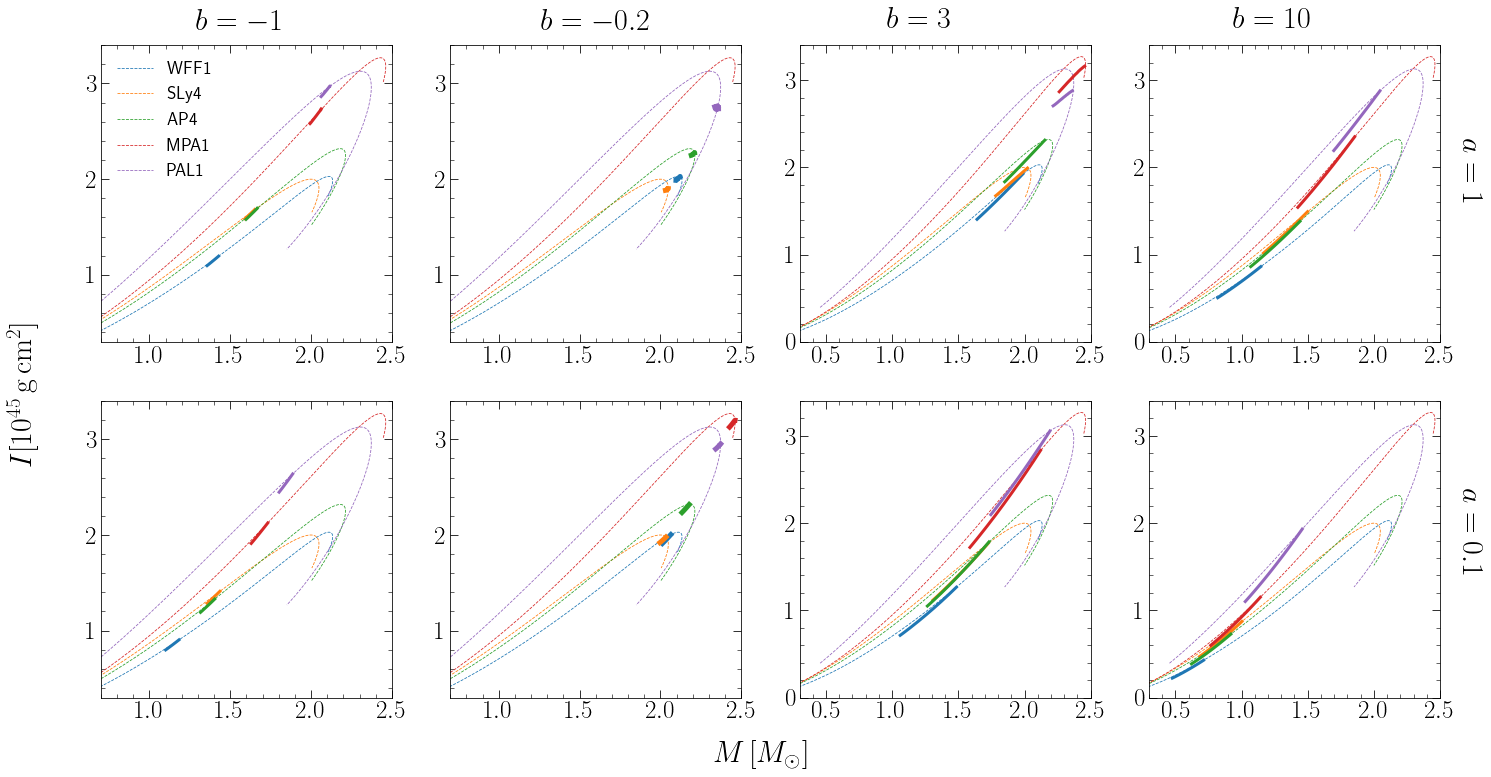

In [7]:
fig, axs = plt.subplots(2, 4,figsize=(24,12),linewidth=2)
colorset=['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple'] 
#plt.setp(axs, xticks=[0, 0.5, 1,1.5,2,2.5])

axs[0,0].set_ylim(0.3,3.4)
axs[0,1].set_ylim(0.3,3.4)
axs[0,2].set_ylim(0, 3.4)
axs[0,3].set_ylim(0, 3.4)
axs[1,0].set_ylim(0.3,3.4)
axs[1,1].set_ylim(0.3,3.4)
axs[1,2].set_ylim(0, 3.4)
axs[1,3].set_ylim(0, 3.4)
axs[0,0].set_xlim(0.7, 2.5)
axs[0,1].set_xlim(0.7, 2.5)
axs[0,2].set_xlim(0.3, 2.5)
axs[0,3].set_xlim(0.3, 2.5)
axs[1,0].set_xlim(0.7, 2.5)
axs[1,1].set_xlim(0.7, 2.5)
axs[1,2].set_xlim(0.3, 2.5)
axs[1,3].set_xlim(0.3, 2.5)


for i in range(2):
    for j in range(4):
        for k in range(5):
            datagr=np.genfromtxt('TOV_5eqs_data'+str(k+1)+'.txt')
            M=datagr[:,1]/MSUN
            I=datagr[:,4]/1e45 
            axs[i,j].plot(M,I,color=colorset[k],linestyle='--',linewidth=0.8,label=label[k])
            axs[i,j].xaxis.set_major_locator(MultipleLocator(0.5))            
            axs[i,j].xaxis.set_minor_locator(MultipleLocator(0.1))
            axs[i,j].yaxis.set_minor_locator(MultipleLocator(0.2))
axs[0,0].legend(frameon=False,fontsize=18)           
       
# the first plot
for i in range(5):
    data=np.genfromtxt('stgb_tid_v1_comb_data'+str(i+21)+'.txt')
    c021, c121, c221, c321, c421, c521, c621, c721, c821, c921, \
    c1021=data[:, 0], data[:, 1], data[:, 2], data[:, 3], \
    data[:, 4], data[:, 5], data[:, 6], data[:, 7], \
    data[:, 8], data[:, 9], data[:, 10] 
    x21 = c321/MSUN 
    y21 = c421/1e45
    axs[0,0].plot(x21, y21, color = colorset[i], linewidth=3) 
    
  
# the second plot
list2=[26,27,28,30]
for i in range(4):
    a=list2[i]
    data=np.genfromtxt('stgb_tid_v1_comb_data'+str(list2[i])+'.txt')
    c021, c121, c221, c321, c421, c521, c621, c721, c821, c921, \
    c1021=data[:, 0], data[:, 1], data[:, 2], data[:, 3], \
    data[:, 4], data[:, 5], data[:, 6], data[:, 7], \
    data[:, 8], data[:, 9], data[:, 10] 
    x21 = c321/MSUN 
    y21 = c421/1e45 
    if a!=30:
        axs[0,1].plot(x21, y21, color = colorset[i], linewidth=5) 
   
    else:
        axs[0,1].plot(x21, y21, color = colorset[i+1], linewidth=7)  

# the third plot
for i in range(5):
    data=np.genfromtxt('stgb_tid_v1_comb_data'+str(31+i)+'.txt')
    c021, c121, c221, c321, c421, c521, c621, c721, c821, c921, \
    c1021=data[:, 0], data[:, 1], data[:, 2], data[:, 3], \
    data[:, 4], data[:, 5], data[:, 6], data[:, 7], \
    data[:, 8], data[:, 9], data[:, 10] 
    x21 = c321/MSUN 
    y21 = c421/1e45
    #index=x21.argsort()
    #ydata=y21[index]
    #xdata=x21[index]
    #s1 = UnivariateSpline(xdata, ydata, s=5)
    #xs=np.linspace(min(xdata),max(xdata), 20)
    #ys=s1(xs)
    axs[0,2].plot(x21, y21, color = colorset[i], linewidth=3) 
         
# the fourth plot
for i in range(5):
    data=np.genfromtxt('stgb_tid_v1_comb_data'+str(36+i)+'.txt')
    c021, c121, c221, c321, c421, c521, c621, c721, c821, c921, \
    c1021=data[:, 0], data[:, 1], data[:, 2], data[:, 3], \
    data[:, 4], data[:, 5], data[:, 6], data[:, 7], \
    data[:, 8], data[:, 9], data[:, 10] 
    x21 = c321/MSUN 
    y21 = c421/1e45
    #index=x21.argsort()
    #ydata=y21[index]
    #xdata=x21[index]
    #s1 = UnivariateSpline(xdata, ydata, s=5)
    #xs=np.linspace(min(xdata),max(xdata),5)
    #ys=s1(xs)
    axs[0,3].plot(x21, y21, color = colorset[i], linewidth=3) 


# the fifth plot
for i in range(5):
    data=np.genfromtxt('stgb_tid_v1_comb_data'+str(1+i)+'.txt')
    c021, c121, c221, c321, c421, c521, c621, c721, c821, c921, \
    c1021=data[:, 0], data[:, 1], data[:, 2], data[:, 3], \
    data[:, 4], data[:, 5], data[:, 6], data[:, 7], \
    data[:, 8], data[:, 9], data[:, 10] 
    x21 = c321/MSUN 
    y21 = c421/1e45
    axs[1,0].plot(x21, y21, color = colorset[i], linewidth=3) 
      
# the sixth plot
for i in range(5):
    data=np.genfromtxt('stgb_tid_v1_comb_data'+str(6+i)+'.txt')
    c021, c121, c221, c321, c421, c521, c621, c721, c821, c921, \
    c1021=data[:, 0], data[:, 1], data[:, 2], data[:, 3], \
    data[:, 4], data[:, 5], data[:, 6], data[:, 7], \
    data[:, 8], data[:, 9], data[:, 10] 
    x21 = c321/MSUN 
    y21 = c421/1e45
    axs[1,1].plot(x21, y21, color = colorset[i], linewidth=5)  
    
# the seventh plot
for i in range(5):
    data=np.genfromtxt('stgb_tid_v1_comb_data'+str(11+i)+'.txt')
    c021, c121, c221, c321, c421, c521, c621, c721, c821, c921, \
    c1021=data[:, 0], data[:, 1], data[:, 2], data[:, 3], \
    data[:, 4], data[:, 5], data[:, 6], data[:, 7], \
    data[:, 8], data[:, 9], data[:, 10] 
    x21 = c321/MSUN 
    y21 = c421/1e45
    #index=x21.argsort()
    #ydata=y21[index]
    #xdata=x21[index]
    #s1 = UnivariateSpline(xdata, ydata, s=5)
    #xs=np.linspace(min(xdata),max(xdata),5)
    #ys=s1(xs)
    axs[1,2].plot(x21, y21, color = colorset[i], linewidth=3) 
      
# the eighth plot
for i in range(5):
    data=np.genfromtxt('stgb_tid_v1_comb_data'+str(16+i)+'.txt')
    c021, c121, c221, c321, c421, c521, c621, c721, c821, c921, \
    c1021=data[:, 0], data[:, 1], data[:, 2], data[:, 3], \
    data[:, 4], data[:, 5], data[:, 6], data[:, 7], \
    data[:, 8], data[:, 9], data[:, 10] 
    x21 = c321/MSUN 
    y21 = c421/1e45
    #index=x21.argsort()
    #ydata=y21[index]
    #xdata=x21[index]
    #s1 = UnivariateSpline(xdata, ydata, s=5)
    #xs=np.linspace(min(xdata),max(xdata),5)
    #ys=s1(xs)
    axs[1,3].plot(x21, y21, color = colorset[i], linewidth=3)
           
            
       
                      
fig.text(0.08, 0.40,r'$I[\rm 10^{45} \, g\,cm^2]$'  , ha='center', fontsize=30,rotation='vertical')
fig.text(0.48, 0.05, r'$M\,[{ M_{\odot}}]$',fontsize=30)      
fig.text(0.91, 0.7, r'$a=1$' ,fontsize=30, rotation='-90')          
fig.text(0.91, 0.27, r'$a=0.1$' ,fontsize=30, rotation='-90')     
fig.text(0.18, 0.9, r'$b=-1$' ,fontsize=30)     
fig.text(0.38, 0.9, r'$b=-0.2$' ,fontsize=30)     
fig.text(0.58, 0.9, r'$b=3$' ,fontsize=30)   
fig.text(0.78, 0.9, r'$b=10$' ,fontsize=30)  
plt.savefig("fig/fig_nonlin_MI.pdf", format='pdf', bbox_inches="tight")

plt.show()

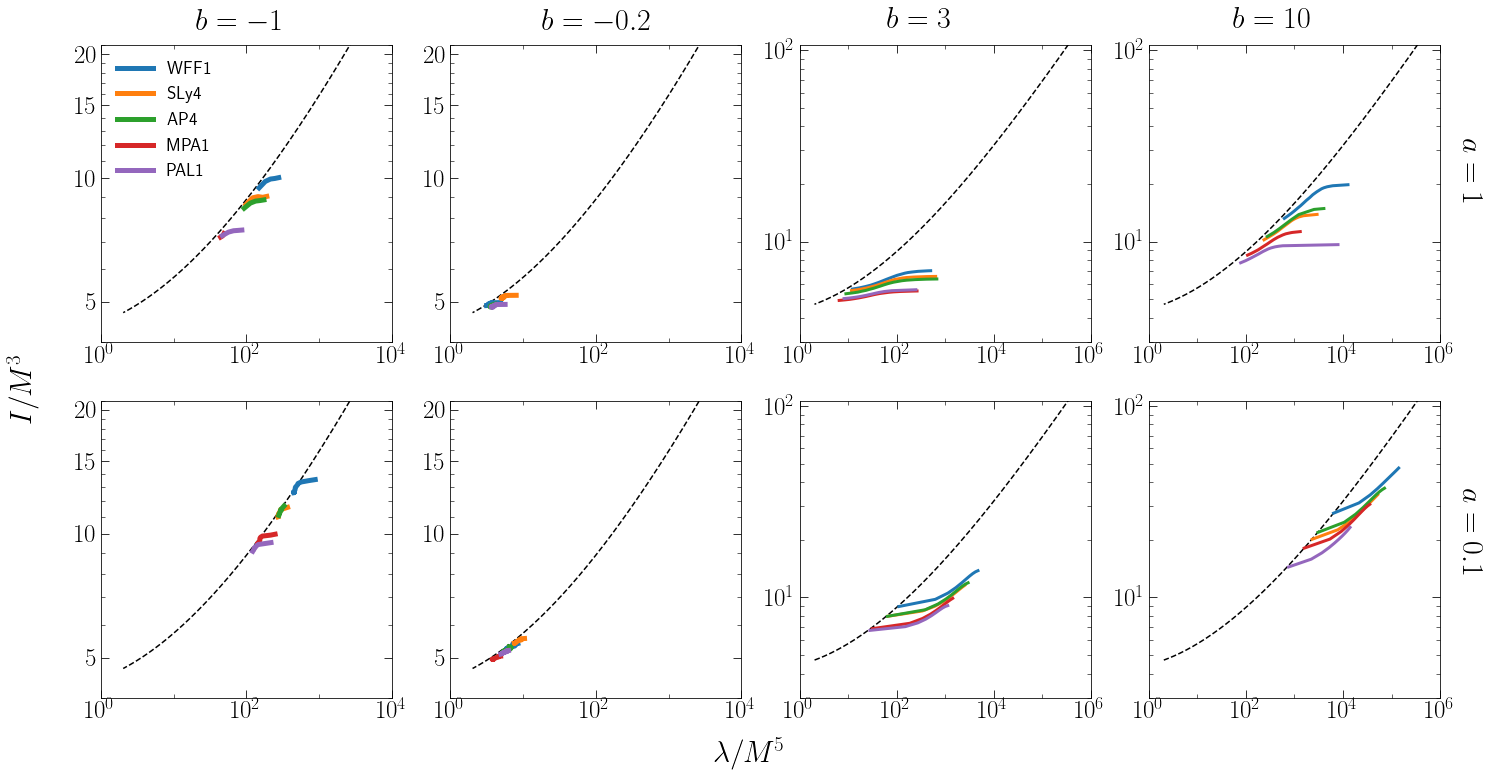

In [8]:
t0 = timeit.time.time()
from shapely.geometry import LineString
from scipy.interpolate import UnivariateSpline
G=const.G.cgs.value
c=const.c.cgs.value
MSUN=const.M_sun.cgs.value
hbar=const.hbar.cgs.value
m_n=const.m_n.cgs.value
KM=10**5
import math
plt.close()


Ms=const.M_sun.cgs.value
hbar=const.hbar.cgs.value
m_n=const.m_n.cgs.value
km=10**5

PI4 = 4.0 * pi
ka = 8.0 * pi
c = 29979245800.0  # cm/s
G = 6.67408e-8  # cm^3/g/s^2

MSUN = 1.98855e33  # g
KM = 1.0e5  # cm
mB = 1.660538921e-24  # g
E_NUCL = 2.0e14  # minimun energy density for NS core; g/cm^3

runit = 10.*KM # length to parametrize quantities

def rdiml(r):
    """ dimensionless mass """
    return r/runit    
def mdiml(m):
    """ dimensionless mass """
    return G*m/c**2/runit
def Idiml(i):
    """ dimensionless moment of inertia """
    return i*G/c**2 / runit**3
fig, axs = plt.subplots(2, 4,figsize=(24,12),linewidth=2)
colorset=['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple'] 
#plt.setp(axs, xticks=[0, 0.5, 1,1.5,2,2.5])

axs[0,0].set_ylim(4,21)
axs[0,1].set_ylim(4,21)
axs[0,2].set_ylim(3,106)
axs[0,3].set_ylim(3,106)
axs[1,0].set_ylim(4,21)
axs[1,1].set_ylim(4,21)
axs[1,2].set_ylim(3,106)
axs[1,3].set_ylim(3,106)
axs[0,0].set_xlim(1, 1e4)
axs[0,1].set_xlim(1,1e4)
axs[0,2].set_xlim(1,1e6)
axs[0,3].set_xlim(1,1e6)
axs[1,0].set_xlim(1,1e4)
axs[1,1].set_xlim(1,1e4)
axs[1,2].set_xlim(1,1e6)
axs[1,3].set_xlim(1,1e6)




ldata1 = np.genfromtxt('TOV_tidal_v1_data1.txt')
a10, a11, a12, a13, a14 = ldata1[:, 0], ldata1[:, 1], ldata1[:, 2], ldata1[:, 3], ldata1[:, 4]
ldata2 = np.genfromtxt('TOV_tidal_v1_data2.txt')
a20, a21, a22, a23, a24 = ldata2[:, 0], ldata2[:, 1], ldata2[:, 2], ldata2[:, 3], ldata2[:, 4]
ldata3 = np.genfromtxt('TOV_tidal_v1_data3.txt')
a30, a31, a32, a33, a34 = ldata3[:, 0], ldata3[:, 1], ldata3[:, 2], ldata3[:, 3], ldata3[:, 4]
ldata4 = np.genfromtxt('TOV_tidal_v1_data4.txt')
a40, a41, a42, a43, a44 = ldata4[:, 0], ldata4[:, 1], ldata4[:, 2], ldata4[:, 3], ldata4[:, 4]
ldata5 = np.genfromtxt('TOV_tidal_v1_data5.txt')
a50, a51, a52, a53, a54 = ldata5[:, 0], ldata5[:, 1], ldata5[:, 2], ldata5[:, 3], ldata5[:, 4]

ldata1 = np.genfromtxt('TOV_5eqs_data1.txt')
b14 = ldata1[:, 4]
c14 = Idiml(b14)/(mdiml(a11))**3
ldata2 = np.genfromtxt('TOV_5eqs_data2.txt')
b24 = ldata2[:, 4]
c24 = Idiml(b24)/(mdiml(a21))**3
ldata3 = np.genfromtxt('TOV_5eqs_data3.txt')
b34 = ldata3[:, 4]
c34 = Idiml(b34)/(mdiml(a31))**3
ldata4 = np.genfromtxt('TOV_5eqs_data4.txt')
b44 = ldata4[:, 4]
c44 = Idiml(b44)/(mdiml(a41))**3
ldata5 = np.genfromtxt('TOV_5eqs_data5.txt')
b54 = ldata5[:, 4]
c54 = Idiml(b54)/(mdiml(a51))**3

def poly4f(x, a, b, c, d, e):
    return a + b*x + c*x**2 + d*x**3 + e*x**4

ntrim1 = np.argmax( a11 ) 

xset = np.log( a13[0: ntrim1] )
yset = poly4f(xset, 1.496, 0.05951, 0.02238, -6.953e-4, 8.345e-6)     # Yagi and Yunes' fit
yset1 = poly4f(xset, 1.493, 0.06433, 0.02104, -0.0005637, 3.947e-6)   # Rui's fit
#yset2 = poly4f(xset, 1.471, 0.06022, 0.01493, 5.933e-5, -1.007e-5)

xexpset = np.exp(xset)
yexpset = np.exp(yset)
yexpset1 = np.exp(yset1)
axs[0,0].loglog(xexpset, yexpset1, '--', color = 'black')
axs[0,1].loglog(xexpset, yexpset1, '--', color = 'black')
axs[0,2].loglog(xexpset, yexpset1, '--', color = 'black')
axs[0,3].loglog(xexpset, yexpset1, '--', color = 'black')
axs[1,0].loglog(xexpset, yexpset1, '--', color = 'black')
axs[1,1].loglog(xexpset, yexpset1, '--', color = 'black')
axs[1,2].loglog(xexpset, yexpset1, '--', color = 'black')
axs[1,3].loglog(xexpset, yexpset1, '--', color = 'black')

"""
for i in range(0,2):
   for j in range(0,4):
      axs[i,j].loglog(a13, c14, '--', color = colorset[0])
      axs[i,j].loglog(a23, c24, '--', color = colorset[1])
      axs[i,j].loglog(a33, c34, '--', color = colorset[2])
      axs[i,j].loglog(a43, c44, '--', color = colorset[3])
      axs[i,j].loglog(a53, c54, '--', color = colorset[4])
"""

ntrim1set=[13, 16, 14, 15, 13]
ntrim2set=[22, 20, 16, 20]
ntrim3set=[17, 17, 18, 16, 14]
ntrim4set=[18, 14, 9, 16, 13]
ntrim5set=[18, 13, 12, 17, 13]
ntrim6set=[19, 21, 21, 24, 23]

from matplotlib.ticker import ScalarFormatter
import matplotlib.ticker as mticker    
# the first plot
offset = [15, 15, 10, 5, 5]
for i in range(5):
    data=np.genfromtxt('stgb_tid_v1_comb_data'+str(i+21)+'.txt')
    c021, c121, c221, c321, c421, c521, c621, c721, c821, c921, \
    c1021=data[:, 0], data[:, 1], data[:, 2], data[:, 3], \
    data[:, 4], data[:, 5], data[:, 6], data[:, 7], \
    data[:, 8], data[:, 9], data[:, 10] 
    x21 = c921[0:ntrim1set[i]] - offset[i]*np.ones_like(c921[0:ntrim1set[i]])
    y21 = Idiml(c421[0:ntrim1set[i]])/(mdiml(c321[0:ntrim1set[i]]))**3
    index=x21.argsort()
    ydata=y21[index]
    xdata=x21[index]
    s1 = UnivariateSpline(xdata, ydata, s=5)
    xs=np.linspace(min(xdata),max(xdata), 5)
    ys=s1(xs)      
    #axs[0,0].plot(x21, y21, 'o', color = colorset[i])
    axs[0,0].plot(xs, ys, color = colorset[i], linewidth=5,label=label[i])

axs[0,0].legend(fontsize=18,frameon=False)
axs[0,0].set_yticks([5,10,15,20])
axs[0,0].yaxis.set_major_formatter(mticker.ScalarFormatter())  
axs[0,0].yaxis.set_minor_locator(MultipleLocator(1))
axs[0,0].yaxis.set_minor_formatter(mticker.NullFormatter()) 
#axs[0,0].minorticks_off()
axs[0,0].set_xticks([1, 100, 1e4]) 
x_minor = mticker.LogLocator(base = 10.0, subs = np.arange(1.0, 2.0) * 1, numticks = 10)
axs[0,0].xaxis.set_minor_locator(x_minor)
axs[0,0].xaxis.set_minor_formatter(mticker.NullFormatter())
#axs[0,0].tick_params(axis='x', which='minor')
        
# the second plot
list2=[26,27,28,30]
offset = [1, 1, 0.5, 0.5]
for i in range(4):
    a=list2[i]
    data=np.genfromtxt('stgb_tid_v1_comb_data'+str(list2[i])+'.txt')
    c021, c121, c221, c321, c421, c521, c621, c721, c821, c921, \
    c1021=data[:, 0], data[:, 1], data[:, 2], data[:, 3], \
    data[:, 4], data[:, 5], data[:, 6], data[:, 7], \
    data[:, 8], data[:, 9], data[:, 10] 
    x21 = c921[0:ntrim2set[i]] - offset[i]*np.ones_like(c921[0:ntrim2set[i]])
    y21 = Idiml(c421[0:ntrim2set[i]])/(mdiml(c321[0:ntrim2set[i]]))**3
    index=x21.argsort()
    ydata=y21[index]
    xdata=x21[index]
    s1 = UnivariateSpline(xdata, ydata, s=5)
    xs=np.linspace(min(xdata),max(xdata), 5)
    ys=s1(xs)    
    if a!=30:
        #axs[0,1].plot(x21, y21, 'o', color = colorset[i])    
        axs[0,1].plot(x21, y21, color = colorset[i], linewidth=5) 
   
    else:
        #axs[0,1].plot(x21, y21, 'o', color = colorset[i+1])     
        axs[0,1].plot(x21, y21, color = colorset[i+1], linewidth=5)  
axs[0,1].set_yticks([5,10,15,20])
axs[0,1].yaxis.set_major_formatter(mticker.ScalarFormatter())  
axs[0,1].yaxis.set_minor_locator(MultipleLocator(1))
axs[0,1].yaxis.set_minor_formatter(mticker.NullFormatter()) 
#axs[0,1].minorticks_off()
axs[0,1].set_xticks([1, 100, 1e4]) 
x_minor = mticker.LogLocator(base = 10.0, subs = np.arange(1.0, 2.0) * 1, numticks = 10)
axs[0,1].xaxis.set_minor_locator(x_minor)
axs[0,1].xaxis.set_minor_formatter(mticker.NullFormatter())
    
# the third plot
for i in range(5):
    data=np.genfromtxt('stgb_tid_v1_comb_data'+str(31+i)+'.txt')
    c021, c121, c221, c321, c421, c521, c621, c721, c821, c921, \
    c1021=data[:, 0], data[:, 1], data[:, 2], data[:, 3], \
    data[:, 4], data[:, 5], data[:, 6], data[:, 7], \
    data[:, 8], data[:, 9], data[:, 10] 
    x21 = c921[0:ntrim3set[i]] 
    y21 = Idiml(c421[0:ntrim3set[i]])/(mdiml(c321[0:ntrim3set[i]]))**3
    #index=x21.argsort()
    #ydata=y21[index]
    #xdata=x21[index]
    #s1 = UnivariateSpline(xdata, ydata, s=5)
    #xs=np.linspace(min(xdata),max(xdata), 20)
    #ys=s1(xs)
    axs[0,2].plot(x21, y21, color = colorset[i], linewidth=3) 
axs[0,2].set_xticks([1, 100, 1e4, 1e6])    
x_minor = mticker.LogLocator(base = 10.0, subs = np.arange(1.0, 2.0) * 1, numticks = 10)
axs[0,2].xaxis.set_minor_locator(x_minor)
axs[0,2].xaxis.set_minor_formatter(mticker.NullFormatter())
         
# the fourth plot
for i in range(5):
    data=np.genfromtxt('stgb_tid_v1_comb_data'+str(36+i)+'.txt')
    c021, c121, c221, c321, c421, c521, c621, c721, c821, c921, \
    c1021=data[:, 0], data[:, 1], data[:, 2], data[:, 3], \
    data[:, 4], data[:, 5], data[:, 6], data[:, 7], \
    data[:, 8], data[:, 9], data[:, 10] 
    x21 = c921[0:ntrim4set[i]] 
    y21 = Idiml(c421[0:ntrim4set[i]])/(mdiml(c321[0:ntrim4set[i]]))**3
    #index=x21.argsort()
    #ydata=y21[index]
    #xdata=x21[index]
    #s1 = UnivariateSpline(xdata, ydata, s=5)
    #xs=np.linspace(min(xdata),max(xdata),5)
    #ys=s1(xs)
    axs[0,3].plot(x21, y21, color = colorset[i], linewidth=3) 
axs[0,3].set_xticks([1, 100, 1e4, 1e6])   
x_minor = mticker.LogLocator(base = 10.0, subs = np.arange(1.0, 2.0) * 1, numticks = 10)
axs[0,3].xaxis.set_minor_locator(x_minor)
axs[0,3].xaxis.set_minor_formatter(mticker.NullFormatter())

# the fifth plot
for i in range(5):
    data=np.genfromtxt('stgb_tid_v1_comb_data'+str(1+i)+'.txt')
    c021, c121, c221, c321, c421, c521, c621, c721, c821, c921, \
    c1021=data[:, 0], data[:, 1], data[:, 2], data[:, 3], \
    data[:, 4], data[:, 5], data[:, 6], data[:, 7], \
    data[:, 8], data[:, 9], data[:, 10] 
    x21 = c721[0:ntrim5set[i]] 
    y21 = Idiml(c421[0:ntrim5set[i]])/(mdiml(c321[0:ntrim5set[i]]))**3
    index=x21.argsort()
    ydata=y21[index]
    xdata=x21[index]
    s1 = UnivariateSpline(xdata, ydata, s=5)
    xs=np.linspace(min(xdata),max(xdata), 5)
    ys=s1(xs)      
    #axs[1,0].plot(x21, y21, 'o', color = colorset[i])     
    axs[1,0].plot(x21, y21, color = colorset[i], linewidth=5) 
axs[1,0].set_yticks([5,10,15,20])
axs[1,0].yaxis.set_major_formatter(mticker.ScalarFormatter())  
axs[1,0].yaxis.set_minor_locator(MultipleLocator(1))
axs[1,0].yaxis.set_minor_formatter(mticker.NullFormatter()) 
#axs[1,0].minorticks_off()
axs[1,0].set_xticks([1, 100, 1e4]) 
x_minor = mticker.LogLocator(base = 10.0, subs = np.arange(1.0, 2.0) * 1, numticks = 10)
axs[1,0].xaxis.set_minor_locator(x_minor)
axs[1,0].xaxis.set_minor_formatter(mticker.NullFormatter())
 
# the sixth plot
for i in range(5):
    data=np.genfromtxt('stgb_tid_v1_comb_data'+str(6+i)+'.txt')
    c021, c121, c221, c321, c421, c521, c621, c721, c821, c921, \
    c1021=data[:, 0], data[:, 1], data[:, 2], data[:, 3], \
    data[:, 4], data[:, 5], data[:, 6], data[:, 7], \
    data[:, 8], data[:, 9], data[:, 10] 
    x21 = c721[0:ntrim6set[i]] 
    y21 = Idiml(c421[0:ntrim6set[i]])/(mdiml(c321[0:ntrim6set[i]]))**3
    index=x21.argsort()
    ydata=y21[index]
    xdata=x21[index]
    s1 = UnivariateSpline(xdata, ydata, s=5)
    xs=np.linspace(min(xdata),max(xdata), 5)
    ys=s1(xs)      
    #axs[1,1].plot(x21, y21, 'o', color = colorset[i])         
    axs[1,1].plot(x21, y21, color = colorset[i], linewidth=5)  
axs[1,1].set_yticks([5,10,15,20])
axs[1,1].yaxis.set_major_formatter(mticker.ScalarFormatter())  
axs[1,1].yaxis.set_minor_locator(MultipleLocator(1))
axs[1,1].yaxis.set_minor_formatter(mticker.NullFormatter()) 
#axs[1,1].minorticks_off()
axs[1,1].set_xticks([1, 100, 1e4]) 
x_minor = mticker.LogLocator(base = 10.0, subs = np.arange(1.0, 2.0) * 1, numticks = 10)
axs[1,1].xaxis.set_minor_locator(x_minor)
axs[1,1].xaxis.set_minor_formatter(mticker.NullFormatter())

# the seventh plot
for i in range(5):
    data=np.genfromtxt('stgb_tid_v1_comb_data'+str(11+i)+'.txt')
    c021, c121, c221, c321, c421, c521, c621, c721, c821, c921, \
    c1021=data[:, 0], data[:, 1], data[:, 2], data[:, 3], \
    data[:, 4], data[:, 5], data[:, 6], data[:, 7], \
    data[:, 8], data[:, 9], data[:, 10] 
    x21 = c721 
    y21 = Idiml(c421)/(mdiml(c321))**3
    index=x21.argsort()
    ydata=y21[index]
    xdata=x21[index]
    s1 = UnivariateSpline(xdata, ydata, s=10)
    xs=np.linspace(min(xdata),max(xdata),10)
    ys=s1(xs)
    axs[1,2].plot(xs, ys, color = colorset[i], linewidth=3) 
axs[1,2].set_xticks([1, 100, 1e4, 1e6])   
x_minor = mticker.LogLocator(base = 10.0, subs = np.arange(1.0, 2.0) * 1, numticks = 10)
axs[1,2].xaxis.set_minor_locator(x_minor)
axs[1,2].xaxis.set_minor_formatter(mticker.NullFormatter())
      
# the eighth plot
for i in range(5):
    data=np.genfromtxt('stgb_tid_v1_comb_data'+str(16+i)+'.txt')
    c021, c121, c221, c321, c421, c521, c621, c721, c821, c921, \
    c1021=data[:, 0], data[:, 1], data[:, 2], data[:, 3], \
    data[:, 4], data[:, 5], data[:, 6], data[:, 7], \
    data[:, 8], data[:, 9], data[:, 10] 
    x21 = c721 
    y21 = Idiml(c421)/(mdiml(c321))**3
    index=x21.argsort()
    ydata=y21[index]
    xdata=x21[index]
    s1 = UnivariateSpline(xdata, ydata, s=10)
    xs=np.linspace(min(xdata),max(xdata), 10)
    ys=s1(xs)
    #axs[1,3].plot(x21, y21, 'o', color = colorset[i])
    axs[1,3].plot(xs, ys, color = colorset[i], linewidth=3)
axs[1,3].set_xticks([1, 100, 1e4, 1e6])             
x_minor = mticker.LogLocator(base = 10.0, subs = np.arange(1.0, 2.0) * 1, numticks = 10)
axs[1,3].xaxis.set_minor_locator(x_minor)
axs[1,3].xaxis.set_minor_formatter(mticker.NullFormatter())
            
       
                      
fig.text(0.08, 0.45,r'$I/M^3$'  , ha='center', fontsize=30,rotation='vertical')
fig.text(0.48, 0.05, r'$\lambda/M^5$',fontsize=30)      
fig.text(0.91, 0.7, r'$a=1$' ,fontsize=30, rotation='-90')          
fig.text(0.91, 0.27, r'$a=0.1$' ,fontsize=30, rotation='-90')     
fig.text(0.18, 0.9, r'$b=-1$' ,fontsize=30)     
fig.text(0.38, 0.9, r'$b=-0.2$' ,fontsize=30)     
fig.text(0.58, 0.9, r'$b=3$' ,fontsize=30)   
fig.text(0.78, 0.9, r'$b=10$' ,fontsize=30)  
plt.savefig("fig/fig_nonlin_Itidal.pdf", format='pdf', bbox_inches="tight")

plt.show()

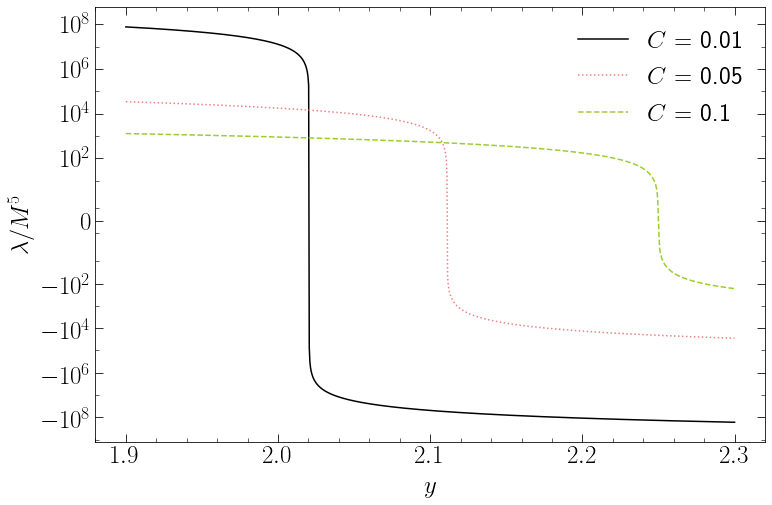

In [9]:
t0 = timeit.time.time()

PI4 = 4.0 * pi
ka = 8.0 * pi
c = 29979245800.0  # cm/s
G = 6.67408e-8  # cm^3/g/s^2

MSUN = 1.98855e33  # g
KM = 1.0e5  # cm
mB = 1.660538921e-24  # g
E_NUCL = 2.0e14  # minimun energy density for NS core; g/cm^3

runit = 10.*KM # length to parametrize quantities

def rdiml(r):
    """ dimensionless mass """
    return r/runit    
def mdiml(m):
    """ dimensionless mass """
    return G*m/c**2/runit
def pdiml(p):
    """ dimensionless pressure """
    return G*p/c**4 * runit**2

def dimllatidal(utidal, ytidal):
    return 16./15. * (1.-2.*utidal)**2 *(2.-ytidal+2.*utidal*(ytidal-1)) / ( 8.*utidal**5*(ytidal+1) + 4.*utidal**4*(3.*ytidal-2.) + 4.*utidal**3*(13.-11.*ytidal) + 6.*utidal**2 *(5.*ytidal-8.) + 2.*utidal*(6.-3.*ytidal) +3.*(1.-2.*utidal)**2*(2.-ytidal+2.*utidal*(ytidal-1))*np.log(1.-2.*utidal) )
          
plt.figure(figsize=(12,8))         
colorset = ['black', 'lightcoral','yellowgreen']

        
ytidalset = np.linspace(1.9, 2.3, 1000)
dimllatidalset1 = dimllatidal(0.01, ytidalset) 
dimllatidalset2 = dimllatidal(0.05, ytidalset) 
dimllatidalset3 = dimllatidal(0.1, ytidalset) 


#print(ytidalset)
#print(dimllatidalset1)
 
# plt.rcParams['xtick.labelsize'] = 12  # number size
# plt.rcParams['ytick.labelsize'] = 12
#plt.rcParams['xtick.major.size'] = 8 # little segment length
#plt.rcParams['ytick.major.size'] = 8        


plt.plot(ytidalset, dimllatidalset1, linestyle='solid', color=colorset[0], label='$C$ = 0.01')
plt.plot(ytidalset, dimllatidalset2, linestyle='dotted', color=colorset[1], label='$C$ = 0.05')
plt.plot(ytidalset, dimllatidalset3, linestyle='dashed', color=colorset[2], label='$C$ = 0.1')

plt.yscale('symlog')
plt.yticks([-1e8, -1e6, -1e4, -1e2, 0, 1e2, 1e4, 1e6, 1e8]) 
plt.minorticks_off()
plt.ylabel(r'$ \lambda/M^5$',fontsize=25)
plt.xlabel(r'$y$',fontsize=25)

plt.legend(fontsize = 25,frameon=False)


plt.minorticks_on()
   
plt.savefig("fig/fig_app4.pdf", format='pdf', bbox_inches="tight")
plt.show()   


 *** STG_solver uses 5.12 seconds



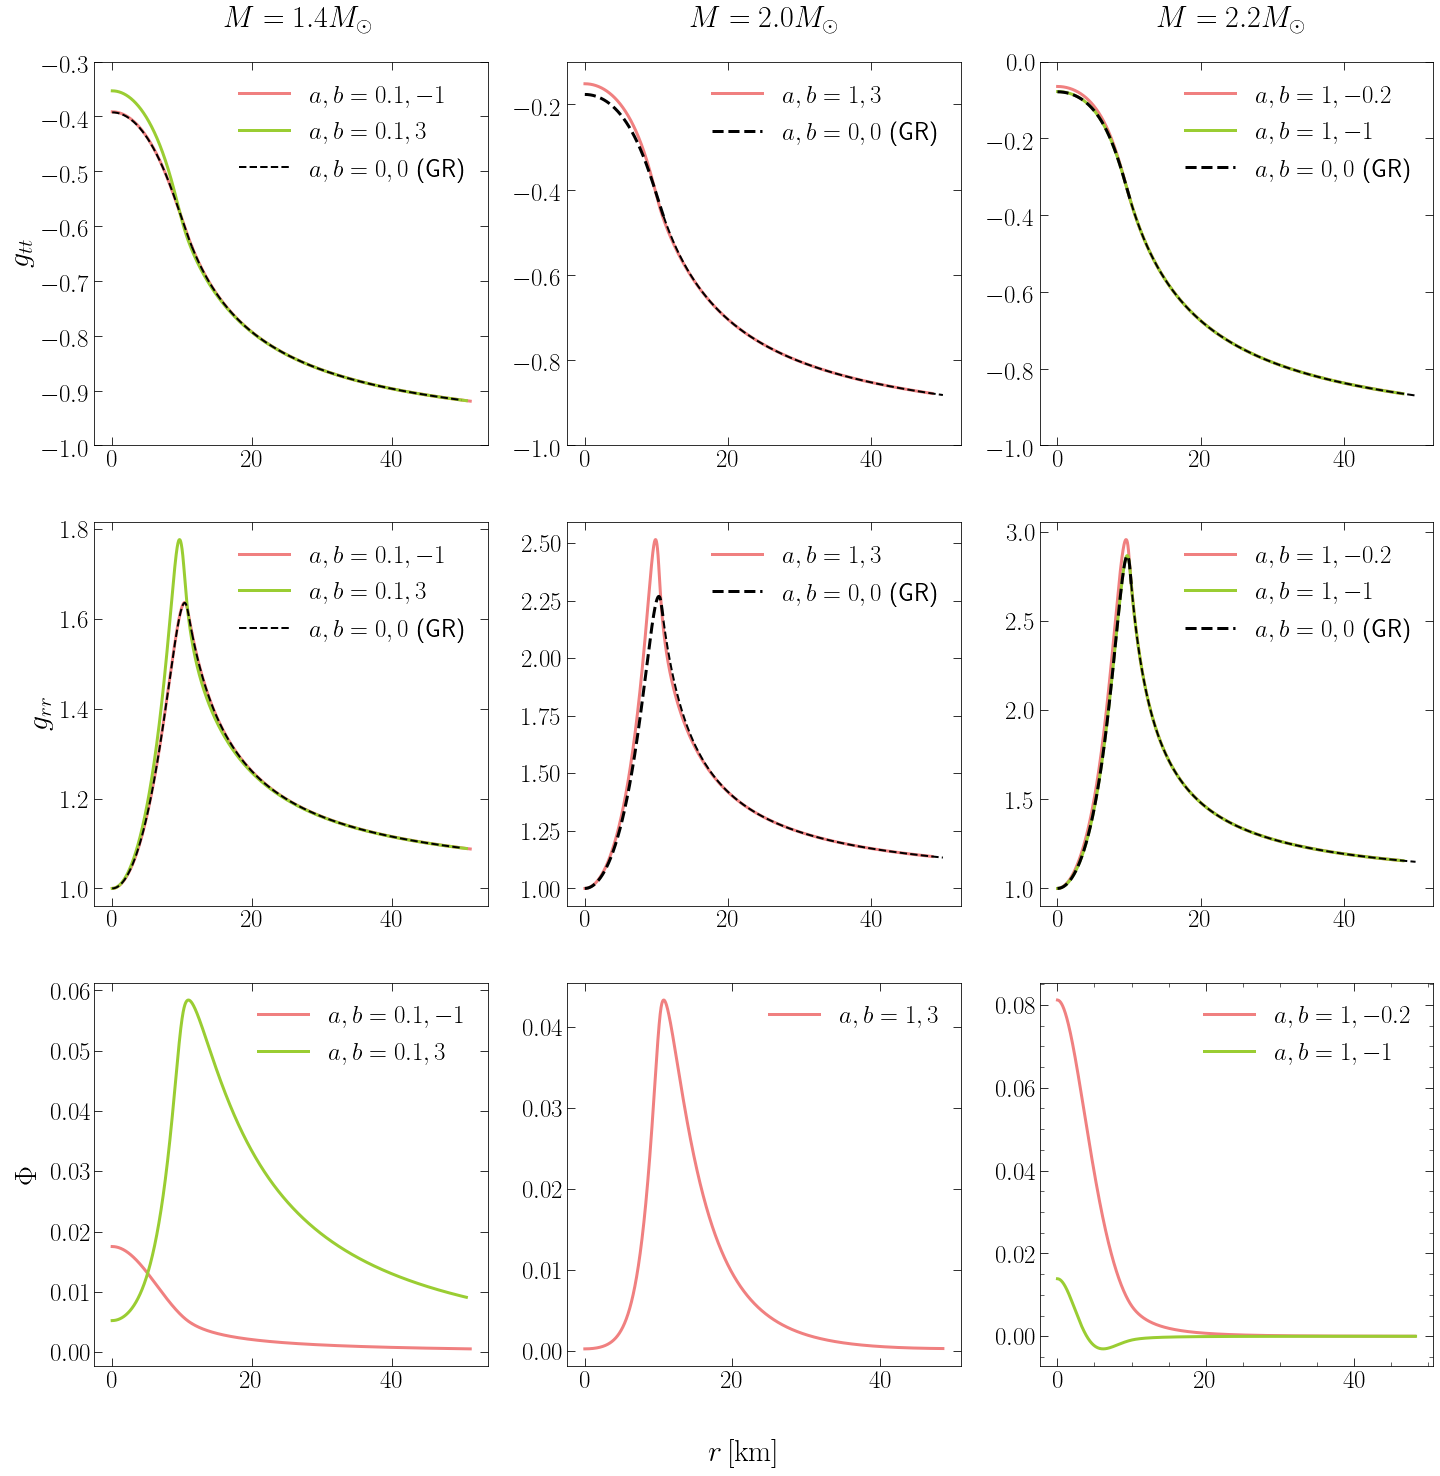

In [10]:
t0 = timeit.time.time()

PI4 = 4.0 * pi
ka = 8.0 * pi
c = 29979245800.0  # cm/s
G = 6.67408e-8  # cm^3/g/s^2

MSUN = 1.98855e33  # g
KM = 1.0e5  # cm
mB = 1.660538921e-24  # g
E_NUCL = 2.0e14  # minimun energy density for NS core; g/cm^3

runit = 10.*KM # length to parametrize quantities

def rdiml(r):
    """ dimensionless mass """
    return r/runit    
def mdiml(m):
    """ dimensionless mass """
    return G*m/c**2/runit
def pdiml(p):
    """ dimensionless pressure """
    return G*p/c**4 * runit**2

def schwarzgtt(r, mass):
   return -1 + 2.0*G*mass/r/c**2

   
colorset=['black', 'lightcoral', 'yellowgreen'] 
linewidthback = 2
linewidthfront = 3
  
grdata1 = np.genfromtxt('TOV_5eqs_sol_data14.txt')
grdata2 = np.genfromtxt('TOV_5eqs_sol_data20.txt')
grdata3 = np.genfromtxt('TOV_5eqs_sol_data22.txt')


# x, gtt, grr, p, e, omega
a10, a11, a12, a13, a14, a15 = grdata1[:, 0], grdata1[:, 1], grdata1[:, 2], grdata1[:, 3], grdata1[:, 4], grdata1[:, 5]
a20, a21, a22, a23, a24, a25 = grdata2[:, 0], grdata2[:, 1], grdata2[:, 2], grdata2[:, 3], grdata2[:, 4], grdata2[:, 5]
a30, a31, a32, a33, a34, a35 = grdata3[:, 0], grdata3[:, 1], grdata3[:, 2], grdata3[:, 3], grdata3[:, 4], grdata3[:, 5]
nptgrext = 1000
x1 = np.linspace(a10[len(a10)-1], 50*KM, nptgrext)
x2 = np.linspace(a20[len(a20)-1], 50*KM, nptgrext)
x3 = np.linspace(a30[len(a30)-1], 50*KM, nptgrext)
y1, y2, y3 = schwarzgtt(x1, 1.4*MSUN), schwarzgtt(x2, 2.0*MSUN), schwarzgtt(x3, 2.2*MSUN)
#print(a10)
#print(x1)


stdata1 = np.genfromtxt('stgb_solver_sol_data1.txt')
stdata2 = np.genfromtxt('stgb_solver_sol_data2.txt')
stdata3 = np.genfromtxt('stgb_solver_sol_data3.txt')
stdata4 = np.genfromtxt('stgb_solver_sol_data4.txt')
stdata5 = np.genfromtxt('stgb_solver_sol_data5.txt')


# r, nu, mu, phi, dphi/dr, p
c10, c11, c12, c13 = stdata1[:, 0], stdata1[:, 1], stdata1[:, 2], stdata1[:, 3]
gtt1, grr1 = np.zeros_like(c11), np.zeros_like(c12)
for i in range(0, len(c10)):
   gtt1[i] = -np.exp(2*c11[i])
   grr1[i] = np.exp(2*c12[i]) 
   
   
c20, c21, c22, c23 = stdata2[:, 0], stdata2[:, 1], stdata2[:, 2], stdata2[:, 3]
gtt2, grr2 = np.zeros_like(c20), np.zeros_like(c20)
for i in range(0, len(c20)):
   gtt2[i] = -np.exp(2*c21[i])
   grr2[i] = np.exp(2*c22[i])
   
   
c30, c31, c32, c33 = stdata3[:, 0], stdata3[:, 1], stdata3[:, 2], stdata3[:, 3]
gtt3, grr3 = np.zeros_like(c30), np.zeros_like(c30)
for i in range(0, len(c30)):
   gtt3[i] = -np.exp(2*c31[i])
   grr3[i] = np.exp(2*c32[i])


c40, c41, c42, c43 = stdata4[:, 0], stdata4[:, 1], stdata4[:, 2], stdata4[:, 3]
gtt4, grr4 = np.zeros_like(c40), np.zeros_like(c40)
for i in range(0, len(c40)):
   gtt4[i] = -np.exp(2*c41[i])
   grr4[i] = np.exp(2*c42[i])
   
   
c50, c51, c52, c53 = stdata5[:, 0], stdata5[:, 1], stdata5[:, 2], stdata5[:, 3]
gtt5, grr5 = np.zeros_like(c50), np.zeros_like(c50)
for i in range(0, len(c50)):
   gtt5[i] = -np.exp(2*c51[i])
   grr5[i] = np.exp(2*c52[i])
   
   
   
     




fig = plt.figure(figsize=(24,24))
ax1 = fig.add_subplot(331)
ax2 = fig.add_subplot(332)
ax3 = fig.add_subplot(333)
ax4 = fig.add_subplot(334)
ax5 = fig.add_subplot(335)
ax6 = fig.add_subplot(336)
ax7 = fig.add_subplot(337)
ax8 = fig.add_subplot(338)
ax9 = fig.add_subplot(339)

fontsizevalue1 = 30
ax1.set_ylabel(r'$g_{tt}$', fontsize=fontsizevalue1)
ax4.set_ylabel(r'$g_{rr}$', fontsize=fontsizevalue1)
ax7.set_ylabel(r'$\Phi$', fontsize=fontsizevalue1)

fig.text(0.2, 0.9, r'$M=1.4M_{\odot}$' ,fontsize=30)     
fig.text(0.47, 0.9, r'$M=2.0M_{\odot}$' ,fontsize=30)     
fig.text(0.74, 0.9, r'$M=2.2M_{\odot}$' ,fontsize=30)  
fig.text(0.48, 0.07, r'$r\,[\rm km]$' ,fontsize=30)



ax1.set_ylim([-1, -0.3])
ax2.set_ylim([-1, -0.1])
ax3.set_ylim([-1, -0.])
"""
ax4.set_xlim([0, 100])
ax5.set_xlim([0, 100])
ax5.set_ylim([1, 3])
ax6.set_xlim([0, 100])
ax6.set_ylim([-0.005, 0.018])

ax1.plot(a10/KM, a11)
ax2.plot(a10/KM, a12)
"""

ntrim1, ntrim2, ntrim3, ntrim4, ntrim5 = 5000, 5000, 5000, 5000, 5000



ax1.plot(c10[:ntrim1]*runit/KM, gtt1[:ntrim1], color = colorset[1], \
         linewidth = linewidthfront, label='$a, b = 0.1, -1$')
ax4.plot(c10[:ntrim1]*runit/KM, grr1[:ntrim1], color = colorset[1], \
         linewidth = linewidthfront,label='$a, b = 0.1, -1$')
ax7.plot(c10[:ntrim1]*runit/KM, c13[:ntrim1], color = colorset[1], \
         linewidth = linewidthfront,label='$a, b = 0.1, -1$')
ax1.plot(c20[:ntrim2]*runit/KM, gtt2[:ntrim2], color = colorset[2], \
         linewidth = linewidthfront, label='$a, b = 0.1, 3$')
ax4.plot(c20[:ntrim2]*runit/KM, grr2[:ntrim2], color = colorset[2], \
         linewidth = linewidthfront, label='$a, b = 0.1, 3$')
ax7.plot(c20[:ntrim2]*runit/KM, c23[:ntrim2], color = colorset[2], \
         linewidth = linewidthfront, label='$a, b = 0.1, 3$')
ax1.plot(a10/KM, a11, '--', color = colorset[0], linewidth = linewidthback)
ax4.plot(a10/KM, a12, '--', color = colorset[0], linewidth = linewidthback)
ax1.plot(x1/KM, y1, '--', color = colorset[0], linewidth = linewidthback, label='$a, b = 0, 0$ (GR)')
ax4.plot(x1/KM, -1./y1, '--', color = colorset[0], linewidth = linewidthback, label='$a, b = 0, 0$ (GR)')


ax2.plot(c30[:ntrim3]*runit/KM, gtt3[:ntrim3], color = colorset[1], \
         linewidth = linewidthfront, label='$a, b = 1, 3$')
ax5.plot(c30[:ntrim3]*runit/KM, grr3[:ntrim3], color = colorset[1], \
         linewidth = linewidthfront, label='$a, b = 1, 3$')
ax8.plot(c30[:ntrim3]*runit/KM, c33[:ntrim3], color = colorset[1], \
         linewidth = linewidthfront, label='$a, b = 1, 3$')
ax2.plot(a20/KM, a21, '--', color = colorset[0], linewidth = linewidthfront, label='$a, b = 0, 0$ (GR)')
ax5.plot(a20/KM, a22, '--', color = colorset[0], linewidth = linewidthfront, label='$a, b = 0, 0$ (GR)')
ax2.plot(x2/KM, y2, '--', color = colorset[0], linewidth = linewidthback)
ax5.plot(x2/KM, -1./y2, '--', color = colorset[0], linewidth = linewidthback)


ax3.plot(c40[:ntrim4]*runit/KM, gtt4[:ntrim4], color = colorset[1], \
         linewidth = linewidthfront, label='$a, b = 1, -0.2$')
ax6.plot(c40[:ntrim4]*runit/KM, grr4[:ntrim4], color = colorset[1], \
         linewidth = linewidthfront, label='$a, b = 1, -0.2$')
ax9.plot(c40[:ntrim4]*runit/KM, c43[:ntrim4], color = colorset[1], \
         linewidth = linewidthfront, label='$a, b = 1, -0.2$')
ax3.plot(c50[:ntrim5]*runit/KM, gtt5[:ntrim5], color = colorset[2], \
         linewidth = linewidthfront, label='$a, b = 1, -1$')
ax6.plot(c50[:ntrim5]*runit/KM, grr5[:ntrim5], color = colorset[2], \
         linewidth = linewidthfront, label='$a, b = 1, -1$')
ax9.plot(c50[:ntrim5]*runit/KM, c53[:ntrim5], color = colorset[2], \
         linewidth = linewidthfront, label='$a, b = 1, -1$')
ax3.plot(a30/KM, a31, linestyle='--', color = colorset[0], \
         linewidth = linewidthfront, label='$a, b = 0, 0$ (GR)')
ax6.plot(a30/KM, a32, '--', color = colorset[0], linewidth = linewidthfront, label='$a, b = 0, 0$ (GR)')
ax3.plot(x3/KM, y3, '--', color = colorset[0], linewidth = linewidthback)
ax6.plot(x3/KM, -1./y3, '--', color = colorset[0], linewidth = linewidthback)


ax1.legend(fontsize=25, frameon=False)
ax4.legend(fontsize=25, frameon=False)
ax7.legend(fontsize=25, frameon=False)
ax2.legend(fontsize=25, frameon=False)
ax5.legend(fontsize=25, frameon=False)
ax8.legend(fontsize=25, frameon=False)
ax3.legend(fontsize=25, frameon=False)
ax6.legend(fontsize=25, frameon=False)
ax9.legend(fontsize=25, frameon=False)

plt.savefig("fig/fig_nonlin_ind.pdf", format='pdf', bbox_inches="tight")

print( '\n *** STG_solver uses %.2f seconds\n' % (timeit.time.time() - t0))
plt.minorticks_on()
plt.show()

